<div style="text-align: center; font-size: 24px; font-weight: bold;">
CREDIT SCORING
</div>

## A. BUSINESS UNDERSTANDING

### A.1. Context

id/x partners didirikan pada tahun 2002 oleh mantan bankir dan konsultan manajemen yang memiliki pengalaman luas dalam manajemen siklus dan proses kredit, pengembangan skoring, dan manajemen kinerja. Pengalaman gabungan pendiri id/x partners telah melayani korporasi di seluruh wilayah Asia dan Australia, serta di berbagai industri, khususnya layanan keuangan, telekomunikasi, manufaktur, dan ritel.

id/x partners menyediakan layanan konsultasi yang mengkhususkan diri dalam memanfaatkan solusi analitik data dan pengambilan keputusan (DAD) yang dikombinasikan dengan disiplin manajemen risiko dan pemasaran terintegrasi untuk membantu klien mengoptimalkan profitabilitas portofolio dan proses bisnis. Layanan konsultasi yang komprehensif dan solusi teknologi yang ditawarkan oleh id/x partners menjadikannya sebagai penyedia layanan terpadu.

Sebagai Data Scientist di ID/X Partners, saya terlibat dalam sebuah proyek dari perusahaan pemberi pinjaman (multifinance), dimana client ingin meningkatkan keakuratan dalam menilai dan mengelola risiko kredit, sehingga dapat mengoptimalkan keputusan bisnis mereka dan mengurangi potensi kerugian. Tugas saya adalah mengembangkan model machine learning yang dapat memprediksi risiko kredit (credit risk) berdasarkan dataset yang disediakan, yang mencakup data pinjaman *Fully Funded*, *Default* dan beberapa kategori terkait lainnya. Dalam pengembangan modelnya saya akan melakukan beberapa tahap dimulai dengan Data Understanding, Exploratory Data Analysis (EDA), Data Preparation, Data Modelling, dan Evaluation. .

### A.2. Problem Statement

Perusahaan multifinance perlu meningkatkan keakuratan penilaian risiko kredit untuk mengoptimalkan keputusan bisnis dan mengurangi kerugian. Sayangnya, identifikasi pola yang mengindikasikan pinjaman berpotensi buruk atau berisiko tanpa tools prediktif seperti Machine Learning hanya menimbulkan asumsi yang bersifat subjektif dan seringkali tidak akurat dalam mendukung pengambilan keputusan investasi. Dengan demikian, saya mengembangkan model machine learning menggunakan data pinjaman dari Lending Club (2007-2014) untuk memprediksi risiko kredit, dengan fokus pada metrik bisnis seperti kerugian dan margin keuntungan bersih.

## A.3. Goals
1. Mengidentifikasi Karakteristik dari peminjam berisiko untuk memahami secara lebih mendalam faktor-faktor yang berkontribusi terhadap pinjaman tersebut.
2. Memprediksi pinjaman yang berpotensi buruk di masa mendatang dengan mengembangkan model prediktif yang dapat mengidentifikasi kasus gagal bayar dengan akurat, sehingga memungkinkan tim bisnis untuk mengambil keputusan berupa  tidak memberikan pinjaman terhadap peminjam berisiko untuk menghindari dampak kerugian.

## A.4. Analytical Approach

1. Model Prediktif:  Membangun model klasifikasi untuk memprediksi kemungkinan peminjam berisiko berdasarkan variabel-variabel yang telah diidentifikasi

2. Faktor-Faktor Pengaruh: Menentukan variabel-variabel yang paling mempengaruhi pinjaman berisiko, seperti besaran pinjaman yang diajukan, lama kerja, kepemilikan rumah dan sebagainya, dengan menggunakan model klasifikasi machine learning untuk penilaian yang lebih akurat

## A.5. Metrics Evaluation

![Confussion Matrix](https://miro.medium.com/v2/resize:fit:1218/1*jMs1RmSwnYgR9CsBw-z1dw.png)

- **True Positive (TP)**: Pinjaman diprediksi berisiko dan kenyataannya memang berisiko
- **True Negative (TN)**: Pinjaman diprediksi tidak berisiko dan kenyataannya memang tidak berisiko

Pada kasus ini, terdapat dua tipe error yang jadi perhatian saat pembuatan model prediksi:
- **False Positive (FP)**: Pinjaman diprediksi berisiko, namun pada kenyataannya tidak demikian. <br>
Konsekuensi: Kehilangan potensi pendapatan
- **False Negative (FN)**: Pinjaman diprediksi tidak berisiko, namun pada kenyataannya sebaliknya <br>
Konsekuensi: Kerugian karena uang yang dipinjamkan tidak dapat dikembalikan

**Target**:   
- 0 : Pinjaman tidak berisiko
- 1 : Pinjaman berisiko/default

**Metrik evaluasi model:** [(Reference)](https://www.kdnuggets.com/2020/04/performance-evaluation-metrics-classification.html)

- **Presisi** merupakan metrics yang digunakan untuk mengukur ada berapa banyak hasil prediksi suatu kelas yang memang sesuai dengan kenyataan. Kata kunci yang sangat tepat untuk menggambarkan presisi adalah *exactness*.
- **Recall** merupakan metrics pada metode klasifikasi yang menyatakan seberapa besar persentase kejadian pada kelas positif yang berhasil dideteksi. Kata kunci yang paling tepat menggambarkan recall adalah *completeness*.
- **F1 score** adalah rataan harmonik dari presisi dan recall. Ketika kita gunakan F1-score dalam pemilihan model machine learning, F1-score dapat menjaga agar model yang kita pilih memiliki nilai recall dan presisi yang seimbang.
- **Accuracy** adalah salah satu metrik evaluasi yang umum digunakan dalam machine learning untuk mengukur sejauh mana model klasifikasi mampu memprediksi dengan benar kelas atau label dari data uji. Secara sederhana, akurasi mengukur persentase prediksi yang benar dari total jumlah prediksi.
- **AUC ROC** (Area Under the Curve of the Receiver Operating Characteristic) adalah kinerja keseluruhan dari sebuah model klasifikasi, yang diringkas dari semua ambang klasifikasi yang mungkin, diberikan oleh luas di bawah kurva ROC, atau AUC.


Berdasarkan konsekuensinya, maka permodelan yang perlu dibangun adalah model yang dapat mengklasifikasikan nasabah default dan non-default se-akurat mungkin. Oleh karena itu, memfokuskan model untuk dapat nilai seimbang dalam memprediksi nasabah default dan non-default menjadi prioritas utama pada model yang dibangun. Maka, metrik `f1 Score` sangat cocok untuk kasus ini.

## B. DATA UNDERSTANDING

### B.1. Import Library

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from scipy.stats import shapiro, chi2_contingency, chi2, mannwhitneyu, spearmanr
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder, RobustScaler

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imbalance Dataset
import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from IPython.display import display
import logging
logging.getLogger('lightgbm').setLevel(logging.WARNING)

# Saving Model
import pickle

#SHAP
import shap

### B.2. Import Dataset

In [2]:
# Load dataset yang dibutuhkan
loan_data = pd.read_csv('loan_data_2007_2014.csv')
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan_data.shape

(466285, 75)

#### Overviews:
- Berdasarkan dataset yang tersedia, terdapat 466285 baris dan 75 kolom.
- Jumlah tersebut cukup besar untuk sebuah dataset, terutama jumlah kolom.
- Dengan demikian, penting untuk melihat data tersebut secara lebih detail.

### B.3. Detail Data dan Kolom 

In [4]:
listItem = []

# kolom Unnamed:0 dihapus karena merupakan indexing yang tidak seharusnya ada pada data
# kolom url dan desc dihapus karena tidak memiliki makna berarti untuk analisis dan modeling, serta mengganggu visibilitas tabel berikut

for col in loan_data.drop(columns=['Unnamed: 0','url','desc'], axis=1).columns:  
 
    listItem.append([col, loan_data[col].nunique(), loan_data[col].unique()])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
unique_values

,Column Name,Number of Unique,Unique Sample
0,id,466285,"[1077501, 1077430, 1077175, 1076863, 1075358, 1075269, 1069639, 1072053, 1071795, 1071570, 1070078, 1069908, 1064687, 1069866, 1069057, 1069759, 1065775, 1069971, 1062474, 1069742, 1069740, 1039153, 1069710, 1069700, 1069559, 1069697, 1069800, 1069657, 1069799, 1047704, 1032111, 1069539, 1065420, 1069591, 1069530, 1069522, 1069361, 1069357, 1069356, 1069346, 1067573, 1069506, 1069314, 1060578, 1069469, 1051117, 1069465, 1069283, 1069287, 1069453, 1069248, 1068120, 1069244, 1069243, 1069238, 1069410, 1068409, 1068487, 1043961, 1068945, 1069142, 1068934, 1069136, 1068923, 1069126, 1069102, 1069093, 1069030, 1068906, 1069073, 1069043, 1060981, 1069071, 1069070, 1068893, 1068882, 1069039, 1068416, 1068997, 1048390, 1068994, 1068475, 1068989, 1068967, 1068744, 1045509, 1063958, 1041756, 1068694, 1068792, 1068558, 1068322, 1065674, 1068547, 1068545, 1068575, 1049528, 1068542, 1068350, 1067874, ...]"
1,member_id,466285,"[1296599, 1314167, 1313524, 1277178, 1311748, 1311441, 1304742, 1288686, 1306957, 1306721, 1305201, 1305008, 1298717, 1304956, 1303503, 1304871, 1299699, 1304884, 1294539, 1304855, 1284848, 1269083, 1304821, 1304810, 1304634, 1273773, 1304679, 1304764, 1304678, 1278806, 1261745, 1304608, 1299514, 1304289, 1291365, 1304589, 1304255, 1304251, 1304250, 1304237, 1301955, 1304567, 1304202, 1292332, 1304526, 1282787, 1304521, 1304166, 1304171, 1303701, 1304123, 1302485, 1304117, 1304116, 1303909, 1303652, 1302790, 1302882, 1274517, 1287308, 1287810, 1277395, 1278095, 1303549, 1303778, 1303750, 1303740, 1303473, 1303528, 1303718, 1303486, 1292558, 1303716, 1299004, 1303514, 1303303, 1303482, 1302799, 1303437, 1279714, 1303432, 1302869, 1282013, 1303403, 1303379, 1276120, 1297940, 1272024, 1303326, 1303200, 1303163, 1302938, 1299785, 1303150, 1303147, 1303001, 1280928, 1303143, 1302971, 1302235, ...]"
2,loan_amnt,1352,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 5375, 6500, 12000, 9000, 1000, 3600, 6000, 9200, 20250, 21000, 15000, 4000, 8500, 4375, 31825, 12400, 10800, 12500, 9600, 4400, 14000, 11000, 25600, 16000, 7100, 13000, 17500, 17675, 8000, 3500, 16425, 8200, 20975, 6400, 14400, 7250, 18000, 35000, 11800, 4500, 10500, 15300, 20000, 6200, 7200, 9500, 18825, 24000, 2100, 5500, 26800, 25000, 19750, 13650, 28000, 10625, 8850, 6375, 11100, 4200, 8875, 13500, 21600, 8450, 13475, 22000, 7325, 7750, 13350, 22475, 8400, 13250, 7350, 11500, 29500, 2000, 11625, 15075, 5300, 8650, 7400, 24250, 26000, 1500, 19600, 4225, 16500, 15600, 14125, 13200, 12300, 1400, 3200, ...]"
3,funded_amnt,1354,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 5375, 6500, 12000, 9000, 1000, 3600, 6000, 9200, 20250, 21000, 15000, 4000, 8500, 4375, 31825, 12400, 10800, 12500, 9600, 4400, 14000, 11000, 25600, 16000, 7100, 13000, 8950, 17675, 8000, 3500, 8925, 16425, 8200, 13575, 6400, 14400, 7200, 18000, 22075, 11800, 4500, 10500, 15300, 12800, 17500, 6200, 9500, 18825, 24000, 2100, 5500, 26800, 25000, 19750, 13650, 35000, 10625, 8850, 6375, 11100, 4200, 8875, 13500, 21600, 8450, 20000, 13475, 22000, 7325, 7750, 13350, 22475, 8400, 28000, 13250, 7350, 11500, 29500, 2000, 11625, 15075, 5300, 8650, 7400, 18100, 26000, 1500, 19600, 4225, 16500, 15600, 14125, 8975, ...]"
4,funded_amnt_inv,9854,"[4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000.0, 7000.0, 5600.0, 5350.0, 6500.0, 12000.0, 9000.0, 1000.0, 3600.0, 6000.0, 9200.0, 19142.16108, 21000.0, 15000.0, 8725.0, 4000.0, 8500.0, 4375.0, 31825.0, 9975.0, 12400.0, 10800.0, 12475.0, 9600.0, 4400.0, 14000.0, 11000.0, 25350.0, 20975.0, 15950.0, 7100.0, 13000.0, 8925.0, 17675.0, 8000.0, 3500.0, 16425.0, 8200.0, 13550.0, 6400.0, 14400.0, 7175.0, 18000.0, 22050.0, 11800.0, 4500.0, 13975.0, 4475.0, 10500.0, 15275.0, 12775.0, 17500.0, 6200.0, 16000.0, 7200.0, 9500.0, 18800.0, 24000.0, 2100.0, 5500.0, 26800.0, 23088.16106, 19725.0, 13650.0, 11775.0, 20120.80657, 35000.0, 10625.0, 8850.0, 6375.0, 11100.0, 4200.0, 8875.0, 13500.0, 15975.0, 20498.26578, 8425.0, 18590.33777,

#### Overviews:
Setelah 72 feature di atas dianalisis, sebagian besar feature datang setelah proses pinjaman berjalan. Feature yang sebenarnya diperlukan adalah feature sebelum proses pinjaman disepakati untuk menilai apakah pinjaman akan berisiko atau tidak, serta menghindari data leakage pada analisis prediktif.

Data leakage adalah terciptanya informasi tambahan yang tidak terduga dalam data pelatihan, yang memungkinkan model atau algoritma machine learning untuk membuat prediksi yang tidak realistis. Misalnya, feature 'out_prncp' (Pokok terutang yang tersisa dari total yang didanai). Jika out_prncp bernilai 0, maka pinjaman sudah dilunasi sepenuhnya. Hal ini akan sangat mudah diprediksi oleh sistem berdasarkan satu feature ini saja.

Feature yang berisi data leakage akan dihilangkan dan hanya menyimpan feature dengan data yang dapat diperoleh sebelum pinjaman diinvestasikan. Hasil akhirnya adalah terdapat 25 features dan 1 target, yakni loan_status, yang akan digunakan pada projek sebagai berikut.

In [5]:
loan_data_use = loan_data[['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership','annual_inc',
                           'verification_status','purpose','addr_state','dti','earliest_cr_line','inq_last_6mths','open_acc',
                           'pub_rec','revol_bal','revol_util','total_acc','initial_list_status','last_credit_pull_d',
                           'collections_12_mths_ex_med','acc_now_delinq','tot_cur_bal','total_rev_hi_lim','loan_status']]
loan_data_use.shape

(466285, 26)

<div style="text-align: center; font-size: 24px; font-weight: bold;">
Attribute Information
</div>



| Attribute | Data Type | Description |
| --- | --- | --- |
| loan_amnt | Int | Jumlah uang yang dipinjam oleh nasabah dari pemberi pinjaman pada awal pinjaman. |
| term | Str | Jangka waktu pinjaman, biasanya dalam bulan, yang menunjukkan berapa lama nasabah harus melunasi pinjaman. Contoh: 36 bulan atau 60 bulan |
| int_rate | Int | Persentase suku bunga tahunan yang diterapkan pada pinjaman. Ini menunjukkan biaya yang dibayar oleh peminjam untuk meminjam uang. |
| installment | Int | Jumlah cicilan yang harus dibayar oleh peminjam setiap bulan untuk melunasi pinjaman, termasuk pokok dan bunga. |
| grade | Str | Klasifikasi kualitas pinjaman berdasarkan risiko kredit peminjam. Kelas pinjaman biasanya diwakili dengan huruf (A, B, C, D, dst.), dengan "A" menunjukkan risiko rendah dan "D" atau lebih tinggi menunjukkan risiko lebih tinggi. |
| emp_length | Str | Durasi bekerja dalam pekerjaan yang sama, biasanya diukur dalam tahun. Ini memberikan indikasi tentang stabilitas pekerjaan peminjam. |
| home_ownership | Str | Menunjukkan status kepemilikan rumah nasabah, apakah mereka milik sendiri (own), menyewa (rent), atau lainnya (mortgage, dst). |
| annual_inc | Int | Pendapatan tahunan yang dilaporkan oleh peminjam, yang mencakup semua sumber pendapatan yang dimiliki peminjam. |
| verification_status | Str | Status verifikasi dari pendapatan atau informasi lainnya yang diberikan oleh peminjam. Biasanya ada dua status: "Not Verified" atau "Verified". |
| purpose | Str | Menunjukkan tujuan pinjaman yang diajukan oleh peminjam, seperti untuk konsolidasi utang, renovasi rumah, pendidikan, dll. |
| addr_state | Str | Negara bagian atau provinsi tempat peminjam tinggal, yang memberikan informasi geografis mengenai tempat tinggal peminjam.|
| dti | Int | Rasio utang terhadap pendapatan (Debt-to-Income ratio), mengukur jumlah utang yang dimiliki peminjam dibandingkan dengan pendapatan mereka. Rasio ini digunakan untuk menilai kemampuan pembayaran pinjaman peminjam. |
| earliest_cr_line | Date | Tanggal pembuatan akun kredit pertama kali atau tanggal terlama dari akun kredit yang dimiliki oleh peminjam. Ini menunjukkan berapa lama peminjam telah membangun riwayat kredit mereka. |
| inq_last_6mths | Int | jumlah penyelidikan atau pengecekan kredit yang dilakukan oleh lembaga keuangan dalam 6 bulan terakhir. Ini mengindikasikan seberapa sering peminjam mengajukan pinjaman atau kredit. |
| open_acc | Int | jumlah akun kredit aktif yang dimiliki oleh nasabah. Ini mencakup kartu kredit, pinjaman, dan akun kredit lainnya. |
| pub_rec | Int | jumlah catatan publik yang dimiliki nasabah, seperti kebangkrutan atau pengadilan. Biasanya, catatan ini menunjukkan masalah finansial yang signifikan |
| revol_bal | Int | jumlah total saldo yang belum dibayar pada akun kredit yang bersifat revolving, seperti kartu kredit. |
| revol_util | Int | persentase penggunaan dari saldo kredit yang tersedia pada akun revolving (kartu kredit). |
| total_acc | Int | jumlah total akun kredit, termasuk kartu kredit, pinjaman, dan jenis akun lainnya yang dimiliki nasabah |
| initial_list_status | Str | status awal aplikasi pinjaman. Biasanya memiliki dua nilai: "w" untuk pinjaman yang dimulai dengan penawaran pinjaman dan "f" untuk pinjaman yang dimulai tanpa penawaran. |
| last_credit_pull_d | Date | Tanggal terakhir kali nasabah dilakukan penarikan informasi kredit oleh pemberi pinjaman atau lembaga keuangan. |
| collections_12_mths_ex_med | Int | Jumlah koleksi yang tercatat dalam 12 bulan terakhir, kecuali yang terkait dengan tagihan medis. |
| acc_now_delinq | Int | Jumlah akun kredit yang terlambat saat ini, yaitu akun yang tidak dibayar tepat waktu. |
| tot_cur_bal | Int | Jumlah saldo total yang dimiliki oleh nasabah pada akun kredit yang mereka miliki saat ini. |
| total_rev_hi_lim | Int | Jumlah batas kredit tertinggi yang tersedia pada akun kredit revolving nasabah. |
| loan_status | Str | Status keuangan pinjaman, apakah pinjaman tersebut masih aktif, dilunasi, atau gagal bayar (default). |

In [6]:
# Melihat isi data dengan lebih jelas
listItem = []

for col in loan_data_use.columns:  
 
    listItem.append([col,
                     loan_data_use[col].dtype,
                     round(loan_data_use[col].isna().sum()/loan_data_use.shape[0]*100,2),
                     loan_data_use[col].nunique(),
                     loan_data_use[col].unique()[:10]])

unique_values = pd.DataFrame(columns=['Column Name', 'DataType', 'Missing Value','Number of Unique', 'Unique Sample'],
                     data=listItem)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
unique_values

,Column Name,DataType,Missing Value,Number of Unique,Unique Sample
0,loan_amnt,int64,0.00,1352,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 5375, 6500, 12000]"
1,term,object,0.00,2,"[ 36 months, 60 months]"
2,int_rate,float64,0.00,506,"[10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64, 21.28, 14.65, 9.91]"
3,installment,float64,0.00,55622,"[162.87, 59.83, 84.33, 339.31, 67.79, 156.46, 170.08, 109.43, 152.39, 121.45]"
4,grade,object,0.00,7,"[B, C, A, E, F, D, G]"
5,emp_length,object,4.51,11,"[10+ years, < 1 year, 1 year, 3 years, 8 years, 9 years, 4 years, 5 years, 6 years, 2 years]"
6,home_ownership,object,0.00,6,"[RENT, OWN, MORTGAGE, OTHER, NONE, ANY]"
7,annual_inc,float64,0.00,31901,"[24000.0, 30000.0, 12252.0, 49200.0, 80000.0, 36000.0, 47004.0, 48000.0, 40000.0, 15000.0]"
8,verification_status,object,0.00,3,"[Verified, Source Verified, Not Verified]"
9,purpose,object,0.00,14,"[credit_card, car, small_business, other, wedding, debt_consolidation, home_improvement, major_purchase, medical, moving]"


### B.4.Descriptive Statistic

In [7]:
loan_data_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  object 
 2   int_rate                    466285 non-null  float64
 3   installment                 466285 non-null  float64
 4   grade                       466285 non-null  object 
 5   emp_length                  445277 non-null  object 
 6   home_ownership              466285 non-null  object 
 7   annual_inc                  466281 non-null  float64
 8   verification_status         466285 non-null  object 
 9   purpose                     466285 non-null  object 
 10  addr_state                  466285 non-null  object 
 11  dti                         466285 non-null  float64
 12  earliest_cr_line            466256 non-null  object 
 13  inq_last_6mths

In [8]:
display(loan_data_use.describe().T, loan_data_use.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
int_rate,466285.0,13.829236,4.357587,5.42,10.99,13.66,16.49,26.06
installment,466285.0,432.061201,243.485550,15.67,256.69,379.89,566.58,1409.99
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.00,63000.00,88960.00,7500000.00
dti,466285.0,17.218758,7.851121,0.00,11.36,16.87,22.78,39.99
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.00,0.00,1.00,33.00
open_acc,466256.0,11.187069,4.987526,0.00,8.00,10.00,14.00,84.00
pub_rec,466256.0,0.160564,0.510863,0.00,0.00,0.00,0.00,63.00
revol_bal,466285.0,16230.203487,20676.245152,0.00,6413.00,11764.00,20333.00,2568995.00
revol_util,465945.0,56.176947,23.732628,0.00,39.20,57.60,74.70,892.30


,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
purpose,466285,14,debt_consolidation,274195
addr_state,466285,50,CA,71450
earliest_cr_line,466256,664,Oct-00,3674
initial_list_status,466285,2,f,303005
last_credit_pull_d,466243,103,Jan-16,327699


#### Overviews:
1. Berdasar method .info(), terlihat data yang sudah lebih ringkas, yakni 25 feature dan 1 target (loan_status)
2. Data terdiri atas 15 tipe numerik dan 10 tipe kategori
3. Pada method .info(), total data berjumlah 466285 baris, sedangkan jumlah di bawah angka tersebut menyiratkan masalah missing value
4. Nilai mean, std, dan median menampilkan fakta outlier pada sejumlah data di mana data tidak terdistribusi secara normal

## C. Exploratory Data Analysis (EDA)

Pada tahap EDA, dataset diselidiki lebih jauh. Proses EDA umumnya dilakukan dengan melihat distribusi persebaran dataset, korelasi antar column pada dataset, ataupun pengecekan lain seperti missing values, duplicates, error, dan lain sebagainya. EDA dapat dilakukan dengan pembuatan ringkasan statistik maupun dengan visualisasi grafik untuk memahami data dengan lebih baik.

Mempertimbangkan bahwa tujuan studi kasus ini adalah untuk memprediksi potensi pinjaman berisiko, maka proses EDA akan dibagi berdasarkan kategori pinjaman berisiko dan tidak berisiko. Hal ini bertujuan agar pola yang dihasilkan lebih spesifik untuk tiap kelompok tersebut. Kolom-kolom lain akan dijelaskan sebagai pendukung saat melakuian proses EDA.

### C.1. Proporsi Peminjam Berisiko dan Tidak Berisiko

**Notes:**
- 0 --> negatif/Fully Paid/Tidak Berisiko
- 1 --> positif/Default/Gagal Bayar/Berisiko

In [9]:
loan_data_use['loan_status'].value_counts()/loan_data_use.shape[0]*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

#### Overviews:
Terdapat 9 kategori loan_status pada awalnya. Namun, 9 kategori tersebut pada dasarnya membentuk 2 kategori pokok saja, yakni default (pinjaman berisiko) dengan output angka 1 dan non-default (pinjaman tidak berisiko) dengan output angka 0 sebagai berikut.

In [10]:
good_loans = ['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']

loan_data_use['good_bad_loan'] = np.where(loan_data_use['loan_status'].isin(good_loans), 0, 1)
loan_data_use.drop(columns=['loan_status'],axis=1,inplace=True)

loan_data_use['good_bad_loan'].value_counts()

0    414099
1     52186
Name: good_bad_loan, dtype: int64

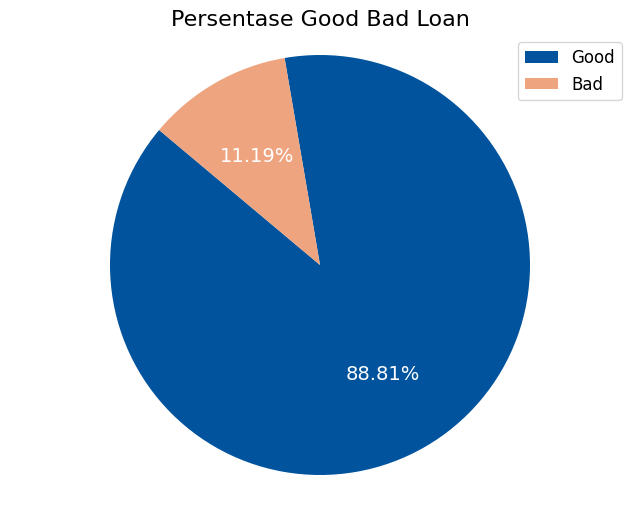

In [11]:
# Data persentase default dan non-default
percentage_default = loan_data_use['good_bad_loan'].value_counts(normalize=True) * 100

# Membuat diagram lingkaran
plt.figure(figsize=(8, 6))
plt.pie(percentage_default,
        labels=percentage_default.index,
        autopct='%1.2f%%',
        startangle=140,
        colors=['#00539CFF', '#EEA47FFF'],
        textprops={'fontsize': 14, 'color': 'white'})

plt.title('Persentase Good Bad Loan', fontsize=16)
plt.legend(labels=['Good', 'Bad'], loc='upper right', fontsize=12)
plt.axis('equal')
plt.show()

#### Overviews:
Terdapat 11.19% data default (peminjam berisiko) dan 88.81% data non-default (peminjam tidak berisiko). Pada analisis supervised learning klasifikasi, data ini disebut imbalance di mana machine learning akan cenderung lebih mudah menebak data non-default dibandingkan data default. Hal ini nantinya diatasi dengan metode imbalance pada bagian modelling.

### C.2. Data Distribution

In [12]:
numeric_column = loan_data_use.select_dtypes(include=['int', 'float']).drop(columns=['good_bad_loan'])
category_column = loan_data_use.drop(columns=['earliest_cr_line', 'last_credit_pull_d'], axis=1).select_dtypes(include=['object'])

In [13]:
display(numeric_column.head(),category_column.head(5))

,loan_amnt,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,total_rev_hi_lim
0,5000,10.65,162.87,24000.0,27.65,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,NaN,NaN
1,2500,15.27,59.83,30000.0,1.00,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,NaN,NaN
2,2400,15.96,84.33,12252.0,8.72,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,NaN,NaN
3,10000,13.49,339.31,49200.0,20.00,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,NaN,NaN
4,3000,12.69,67.79,80000.0,17.94,0.0,15.0,0.0,27783,53.9,38.0,0.0,0.0,NaN,NaN


,term,grade,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status
0,36 months,B,10+ years,RENT,Verified,credit_card,AZ,f
1,60 months,C,< 1 year,RENT,Source Verified,car,GA,f
2,36 months,C,10+ years,RENT,Not Verified,small_business,IL,f
3,36 months,C,10+ years,RENT,Source Verified,other,CA,f
4,60 months,B,1 year,RENT,Source Verified,other,OR,f


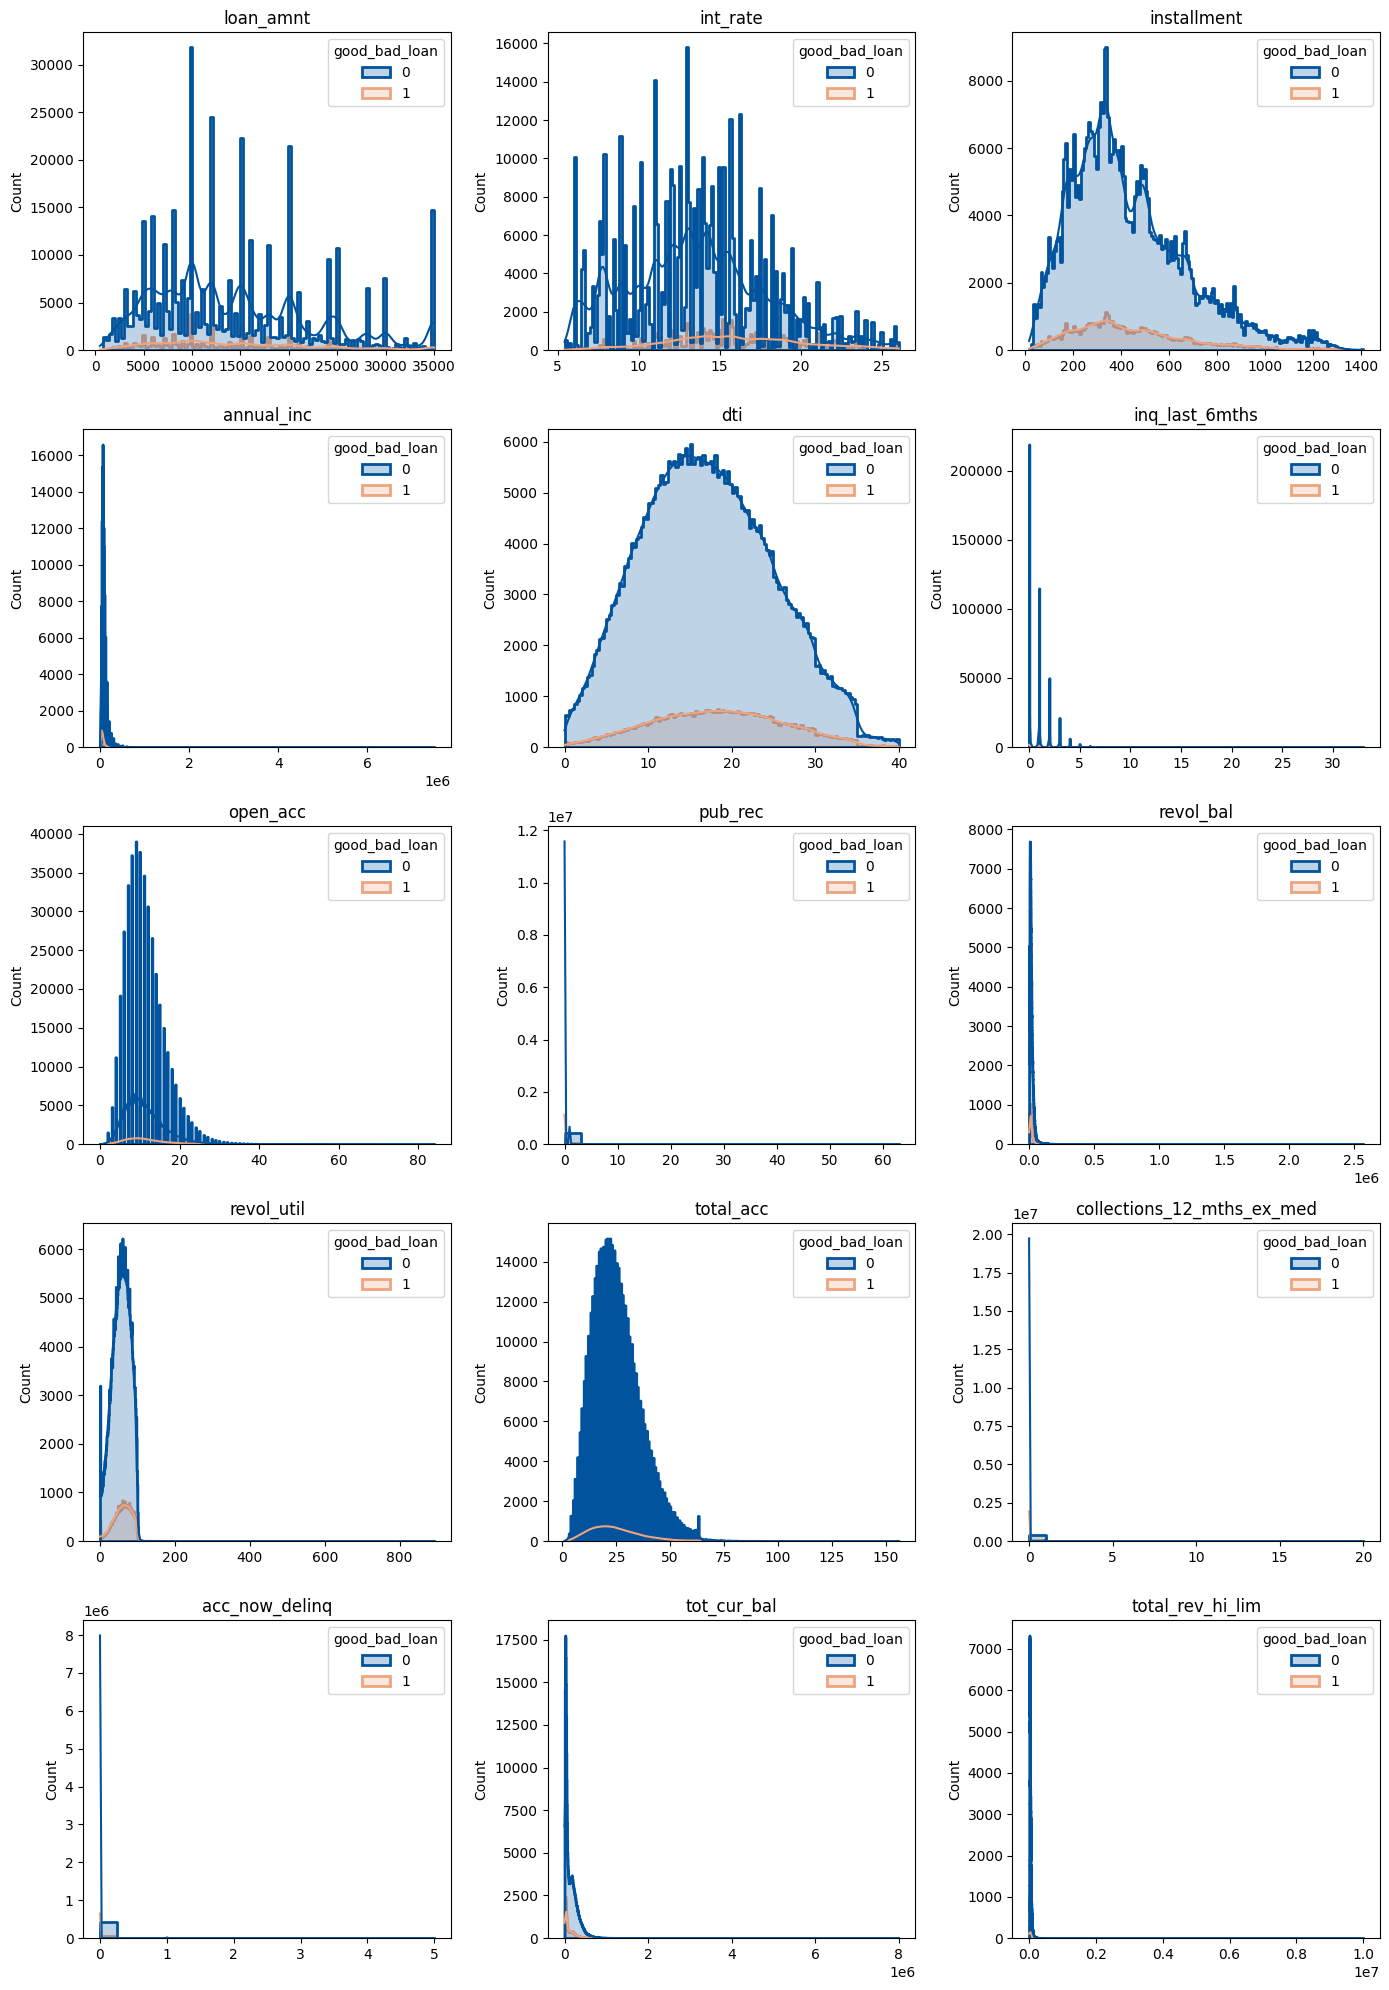

In [14]:
import math
num_cols = numeric_column.shape[1]
num_rows = math.ceil(num_cols / 3)
plt.figure(figsize=(14, num_rows * 4))
for i, col in enumerate(numeric_column.columns, start=1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data=loan_data_use, x=col, hue='good_bad_loan', kde=True, palette=['#00539CFF', '#EEA47FFF'], element='step', linewidth=2)
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()


#### Overviews:
- Grafik di atas menampilkan distribusi data yang bersifat *right skewed* pada sebagian besar feature seperti pub_rec, revol_bal dan sebagainya.
- Distribusi right skewed juga mengindikasikan adanya nilai outlier yang sangat ekstrim yang perlu diatasi.
- Distribusi tampak normal terlihat hanya pada feature dti, namun akan dianalisis lebih lanjut dengan test normalitas data.
- Sekilas, distribusi good loan dan bad loan (default) tampak mirip. Perbedaan hanya terlihat pada bentuk kurtosisnya saja.

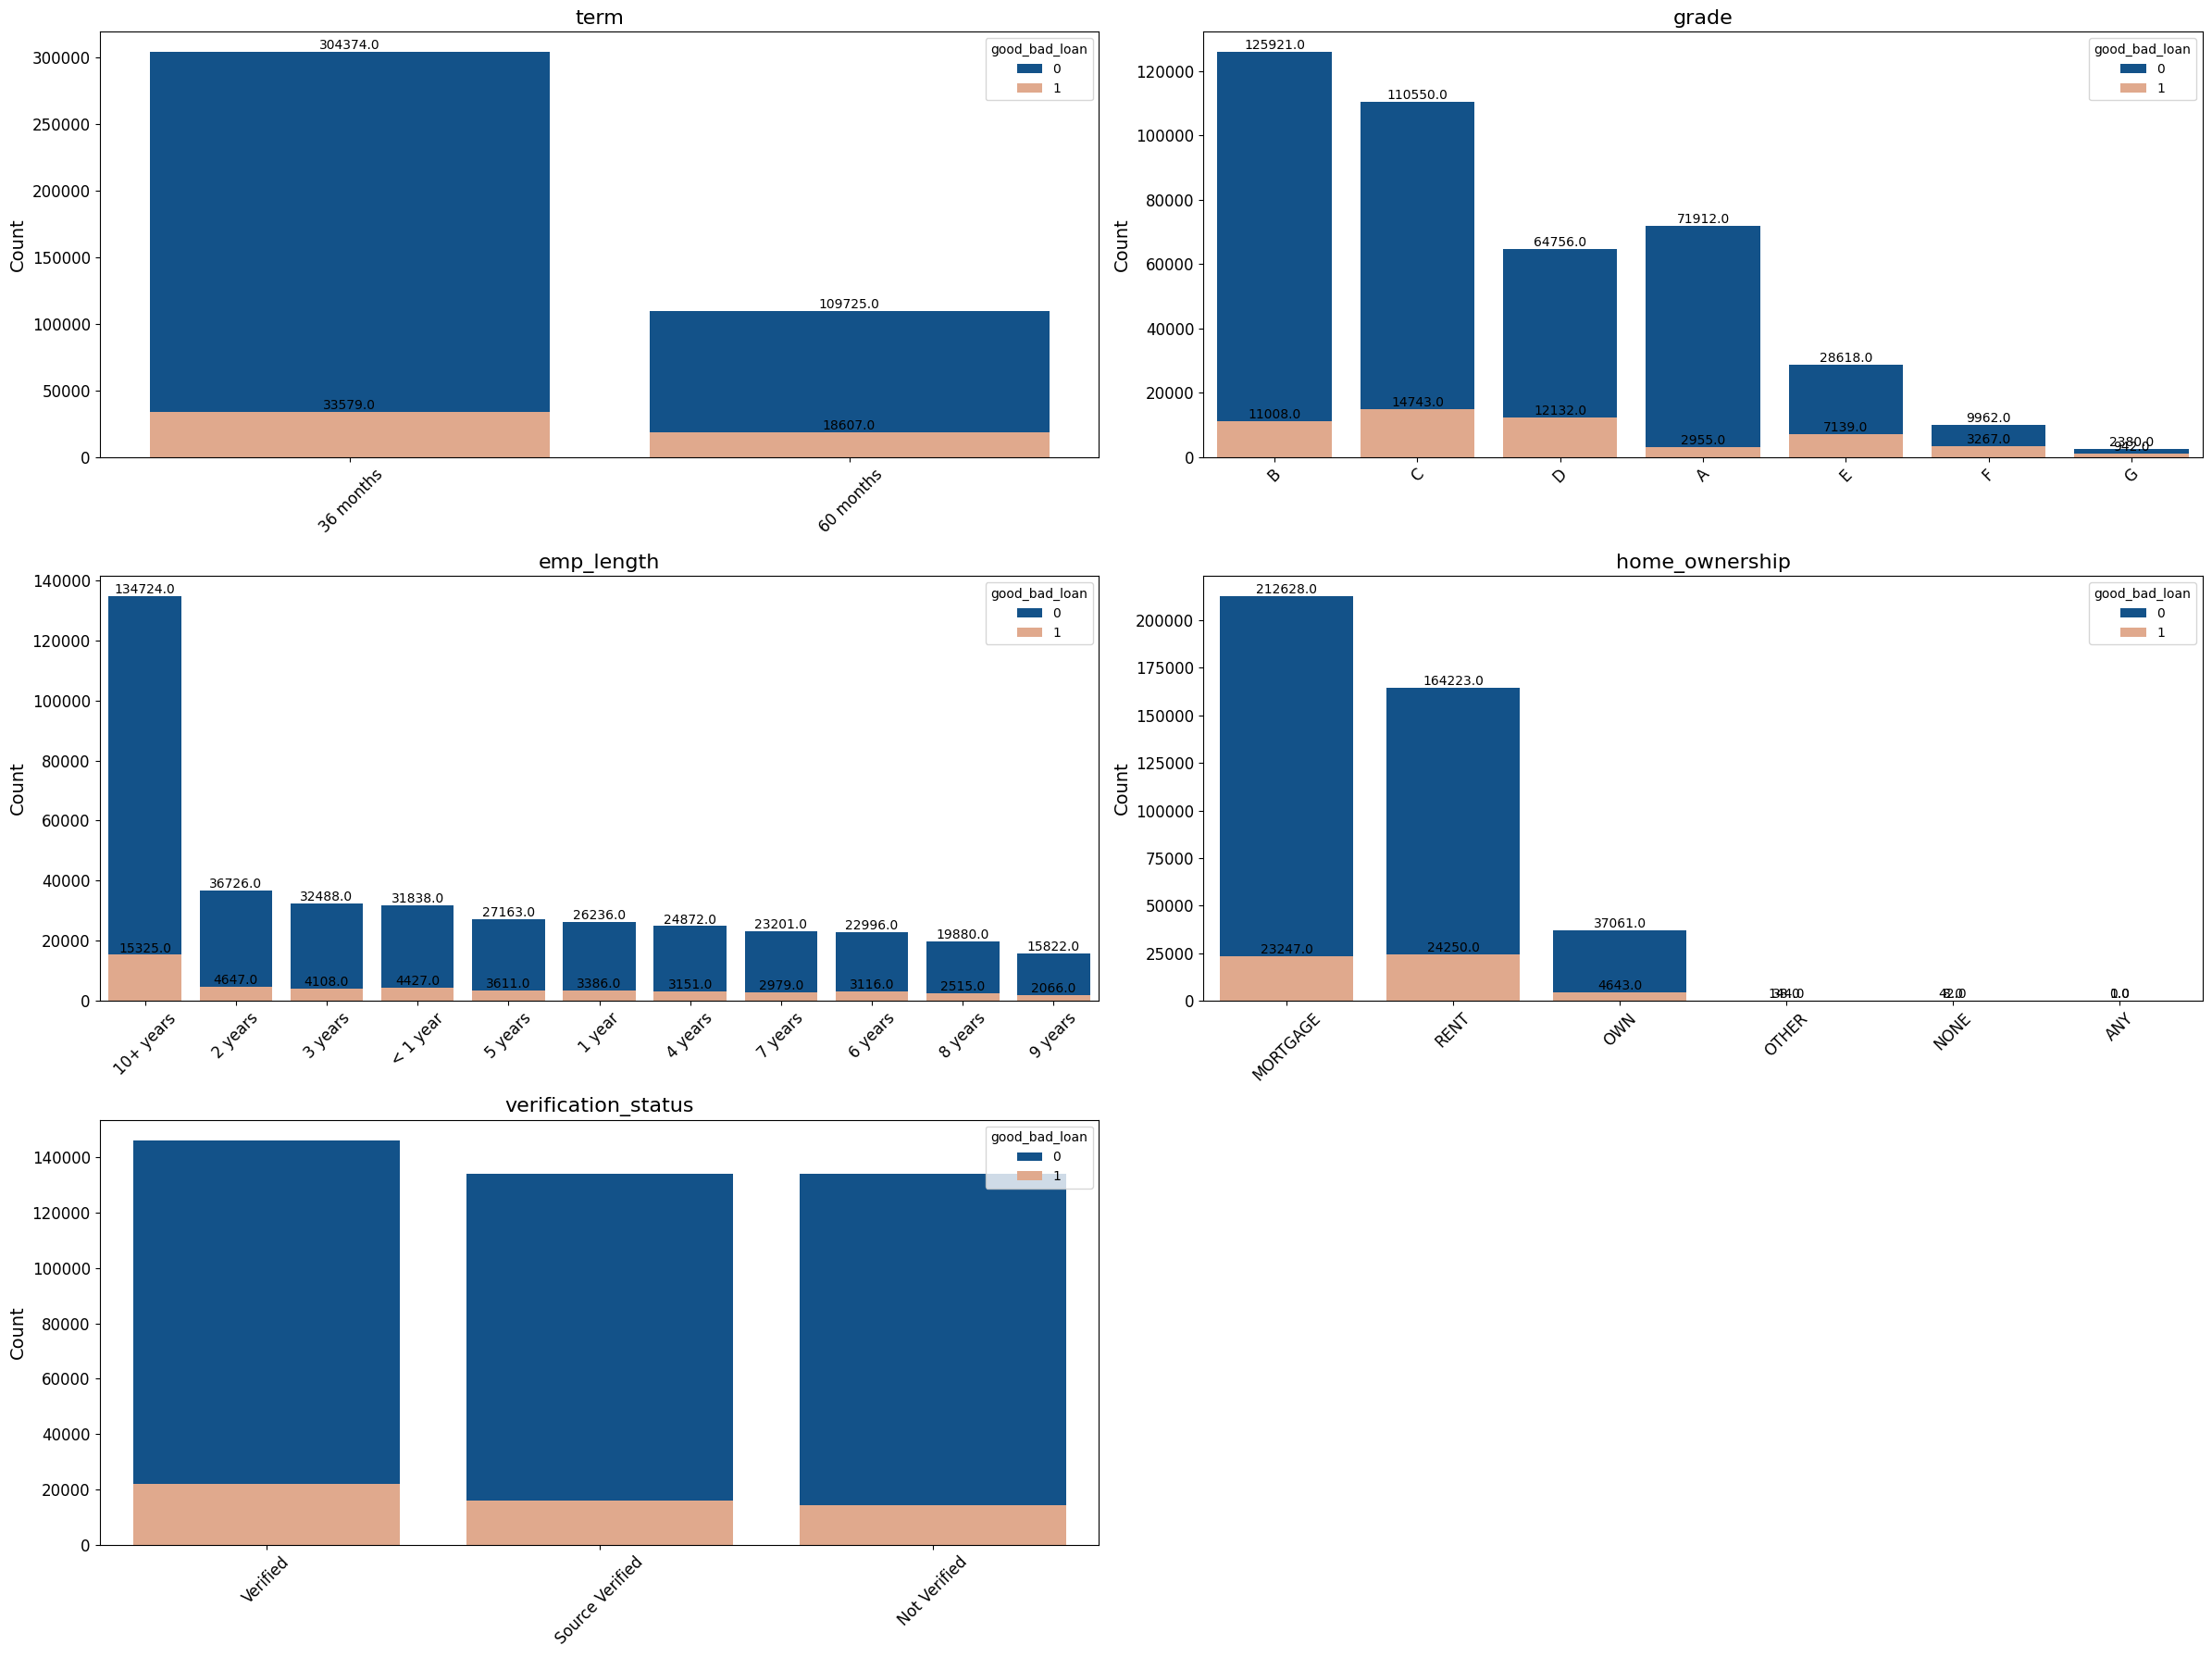

In [15]:
df_combined = pd.concat([category_column, loan_data_use['good_bad_loan']], axis=1)
fig, axs = plt.subplots(3, 2, figsize=(24, 18), gridspec_kw={'width_ratios': [1, 1]})

# Loop untuk mengisi subplot
for ax, col in zip(axs[:3].flatten(), category_column.columns[:4]):
    sorted_counts = df_combined[col].value_counts().index
    sns.countplot(data=df_combined, x=col, hue='good_bad_loan', palette=['#00539CFF', '#EEA47FFF'], dodge=False, order=sorted_counts, ax=ax)
    ax.set_title(col, fontsize=16)
    ax.set_xlabel('', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
    # data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Mengatur subplot terakhir
sorted_counts = df_combined[category_column.columns[4]].value_counts().index
sns.countplot(data=df_combined, x=category_column.columns[4], hue='good_bad_loan', palette=['#00539CFF', '#EEA47FFF'], dodge=False, order=sorted_counts, ax=axs[2, 0])
axs[2, 0].set_title(category_column.columns[4], fontsize=16)
axs[2, 0].set_xlabel('', fontsize=14)
axs[2, 0].set_ylabel('Count', fontsize=14)
axs[2, 0].tick_params(axis='x', rotation=45, labelsize=12)
axs[2, 0].tick_params(axis='y', labelsize=12)

# Menghapus subplot yang tidak digunakan
fig.delaxes(axs[2, 1])

# Menampilkan plot
plt.tight_layout()
plt.show()


#### Overviews:
- Berdasarkan grafik, terlihat bahwa peminjam cenderung memilih term 36 bulan 2.6 kali lebih banyak dibandingkan term 60 bulan.
- Grade B dan C merupakan grade terbanyak. Grade A merupakan peminjam berisiko paling rendah, sedangkan G berisiko paling tinggi.
- Sebagian besar pelanggan memiliki lama kerja 10 tahun atau lebih.
- Mortage dan Rent merupakan status kepemilikan rumah paling banyak. Sedangkan Other, None dan Any memiliki proporsi yang paling kecil.
- feature verification_status memiliki sebaran data yang tampak mirip

#### C.3. Data Distribution Pada Feature earliest_cr_line

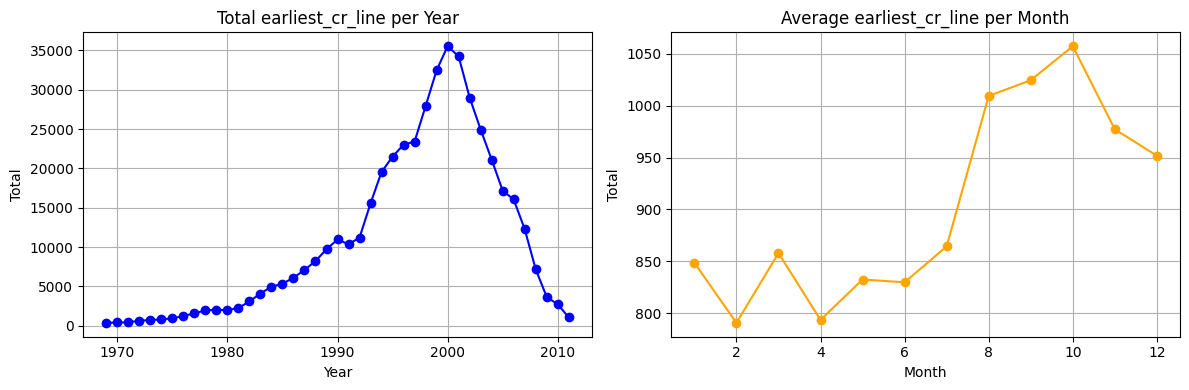

In [16]:
# Buat variabel baru
earliest_cr_line = loan_data_use[['earliest_cr_line']].copy()

# Ubah format menjadi bulan dan tahun
earliest_cr_line['earliest_cr_line'] = pd.to_datetime(earliest_cr_line['earliest_cr_line'], format='%b-%y')

# Memberikan value untuk setiap data
earliest_cr_line['total'] = 1

# Membuat kelompok data baru untuk pembuatan time series
result = earliest_cr_line.groupby(['earliest_cr_line'])['total'].sum()
result = pd.DataFrame(result).reset_index()

# Membuat kolom tahun dan batasi data hanya pada tahun 2014 ke bawah saja
result['year'] = result['earliest_cr_line'].dt.year
result = result[result['year'] < 2014]

# Membuat kolom bulan
result['month'] = result['earliest_cr_line'].dt.month

# Membuat subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 baris, 2 kolom

# Plot pertama: Grup berdasarkan tahun
year = result.groupby('year')['total'].sum().reset_index()
axs[0].plot(year['year'], year['total'], linestyle='-', marker='o', color='blue')
axs[0].set_title('Total earliest_cr_line per Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Total')
axs[0].grid(True)

# Plot kedua: Grup berdasarkan bulan
month = result.groupby('month')['total'].mean().reset_index()
axs[1].plot(month['month'], month['total'], linestyle='-', marker='o', color='orange')
axs[1].set_title('Average earliest_cr_line per Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total')
axs[1].grid(True)

# Menyesuaikan layout
plt.tight_layout()
plt.show()


| Attribute | Data Type | Description |
| --- | --- | --- |
| earliest_cr_line | Date | Tanggal pembuatan akun kredit pertama kali atau tanggal terlama dari akun kredit yang dimiliki oleh peminjam. Ini menunjukkan berapa lama peminjam telah membangun riwayat kredit mereka. |

#### Overviews:
1. Puncak earliest_cr_line adalah pada tahun 2000 sebelum pada akhirnya turun drastis hingga tahun 2010. hal ini perlu dianalisis lebih jauh apakah yang mengajukan pinjaman menurun jumlahnya setelah tahun 2000.
2. Sedangkan dari sisi bulan, puncak earliest_cr_line terjadi pada H2.

### C.4. Data Distribution Pada Feature last_credit_pull_d

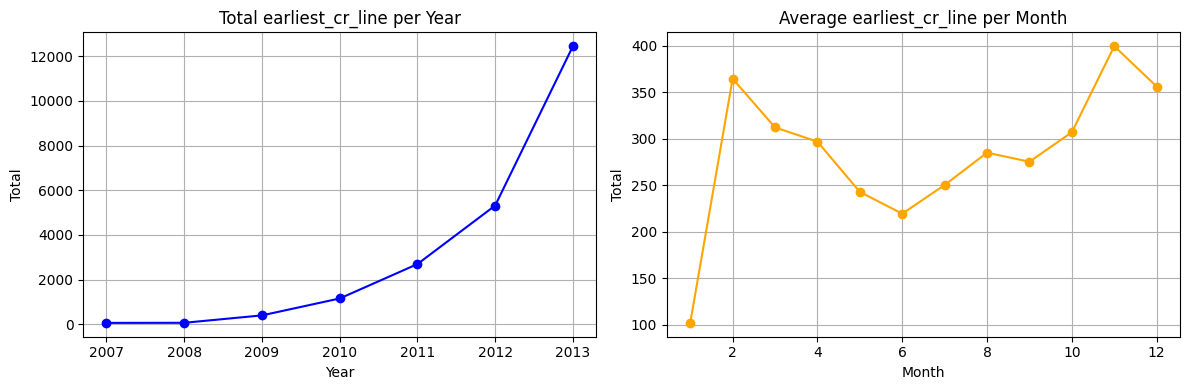

In [17]:
# Buat variabel baru
earliest_cr_line = loan_data_use[['last_credit_pull_d']].copy()

# Ubah format menjadi bulan dan tahun
earliest_cr_line['last_credit_pull_d'] = pd.to_datetime(earliest_cr_line['last_credit_pull_d'], format='%b-%y')

# Memberikan value untuk setiap data
earliest_cr_line['total'] = 1

# Membuat kelompok data baru untuk pembuatan time series
result = earliest_cr_line.groupby(['last_credit_pull_d'])['total'].sum()
result = pd.DataFrame(result).reset_index()

# Membuat kolom tahun dan batasi data hanya pada tahun 2014 ke bawah saja
result['year'] = result['last_credit_pull_d'].dt.year
result = result[result['year'] < 2014]

# Membuat kolom bulan
result['month'] = result['last_credit_pull_d'].dt.month

# Membuat subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 baris, 2 kolom

# Plot pertama: Grup berdasarkan tahun
year = result.groupby('year')['total'].sum().reset_index()
axs[0].plot(year['year'], year['total'], linestyle='-', marker='o', color='blue')
axs[0].set_title('Total earliest_cr_line per Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Total')
axs[0].grid(True)

# Plot kedua: Grup berdasarkan bulan
month = result.groupby('month')['total'].mean().reset_index()
axs[1].plot(month['month'], month['total'], linestyle='-', marker='o', color='orange')
axs[1].set_title('Average earliest_cr_line per Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total')
axs[1].grid(True)

# Menyesuaikan layout
plt.tight_layout()
plt.show()


| Attribute | Data Type | Description |
| --- | --- | --- |
| last_credit_pull_d | Date | Tanggal terakhir kali nasabah dilakukan penarikan informasi kredit oleh pemberi pinjaman atau lembaga keuangan. |

#### Overviews:
1. Seiring tahun, angka last_credit_pull_d semakin naik hingga 2013.
2. Sedangkan dari sisi bulan, puncak last_credit_pull_d terjadi pada bulan Februari dan November.

### C.5. Uji Normalitas Data

Berdasarkan indikasi awal bahwa dataset memiliki persebaran data yang skewed positif, maka uji normalitas dilakukan terhadap data untuk memvalidasi dugaan/temuan awal tersebut.

Uji Normalitas akan menggunakan teknik Shapiro-Wilk dikarenakan beberapa keunggulan dibandingkan teknik lain: [(Reference)](https://www.sciencedirect.com/topics/mathematics/wilk-test) <br>
- Uji Shapiro-Wilk memberikan nilai p yang akurat bahkan untuk ukuran sampel yang kecil.
- Uji Shapiro-Wilk tahan terhadap outlier, yang berarti lebih sedikit dipengaruhi oleh nilai-nilai ekstrem dibandingkan dengan beberapa uji normalitas lainnya.
- Uji Shapiro-Wilk sangat diterima dalam komunitas ilmiah dan direkomendasikan untuk menguji normalitas.

In [18]:
# Defining significance level
significance_level = 0.05

# Performing Shapiro-Wilk test for normality on each numerical column
normality_test_results = {}

for column in loan_data_use.select_dtypes(include=['float64', 'int64']):
    stat, p = shapiro(loan_data_use[column].dropna()) 
    is_significant = p < significance_level
    normality_test_results[column] = {'Statistic': stat, 'p-value': p, 'Significant': is_significant}

# Creating a DataFrame to display the test results
normality_test_df = pd.DataFrame(normality_test_results).T

# Displaying the DataFrame
print(normality_test_df)


                           Statistic p-value Significant
loan_amnt                   0.944553     0.0        True
int_rate                    0.983692     0.0        True
installment                 0.941408     0.0        True
annual_inc                  0.550802     0.0        True
dti                         0.991206     0.0        True
inq_last_6mths              0.731545     0.0        True
open_acc                    0.935482     0.0        True
pub_rec                     0.327182     0.0        True
revol_bal                    0.48387     0.0        True
revol_util                  0.979828     0.0        True
total_acc                   0.964078     0.0        True
collections_12_mths_ex_med  0.054822     0.0        True
acc_now_delinq              0.031568     0.0        True
tot_cur_bal                 0.774963     0.0        True
total_rev_hi_lim            0.416525     0.0        True


#### Overviews:
1. Hasil uji normalitas terhadap distribusi dataset di tiap kolom numerikal menunjukkan dan memvalidasi bahwa persebaran dataset tidak terdistribusi secara normal yaitu terdistribusi skewed positif.
2. Hal ini berdampak ke pertimbangan tindakan penanganan data dan analisa data lebih lanjut, seperti misal penanganan missing value dan outliers.

### C.6. Data Correlation

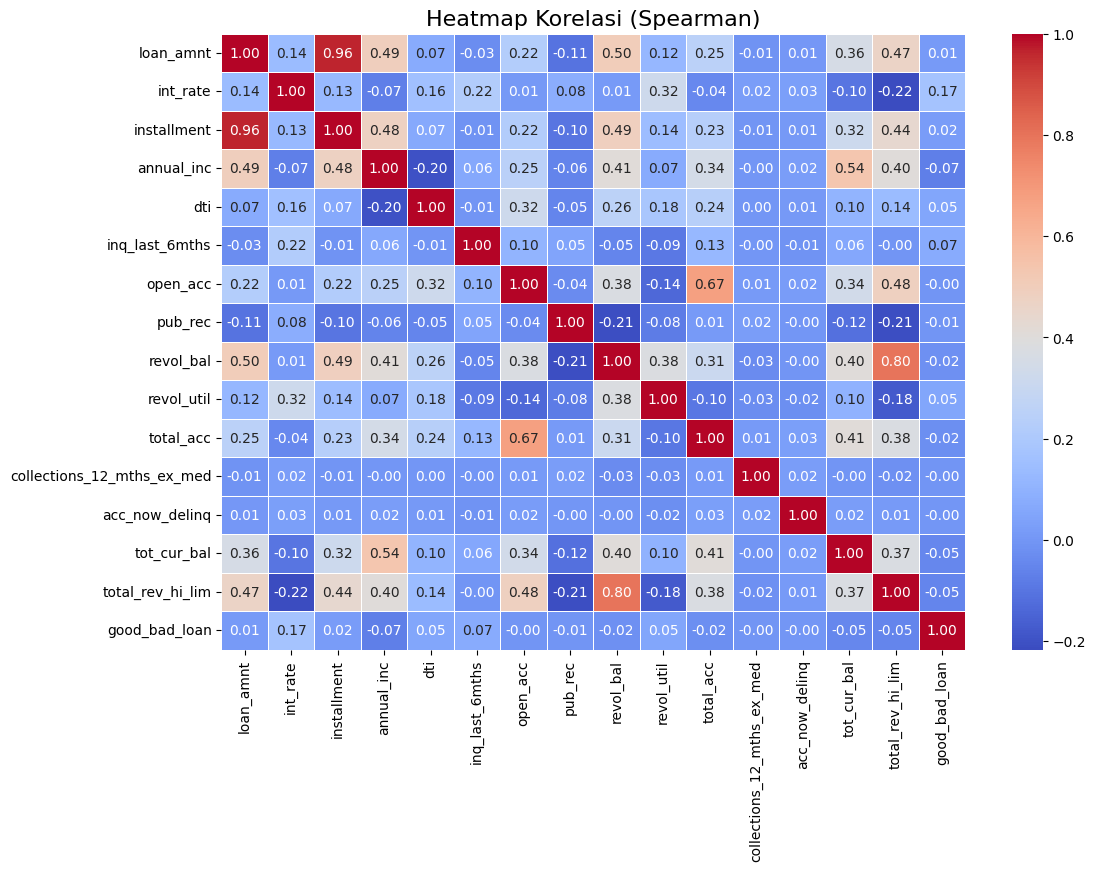

In [19]:
numeric_df = loan_data_use.select_dtypes(include=['int64', 'float64', 'int32'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi (Spearman)', fontsize=16)
plt.show()


#### Overviews:
1. Uji Korelasi dilakukan untuk melihat seberapa kuat hubungan antarvariabel.
2. Method yang digunakan adalah Spearman didasarkan atas distribusi data yang tidak normal.
3. Hasil dari Uji Korelasi kemudian disajikan dalam visualisasi Heatmap supaya mudah untuk dibaca.
4. Berdasarkan hasil Uji Korelasi yang dilakukan, terlihat bahwa hubungan positif paling besar bernilai 0.96 dan hubungan negatif paling besar bernilai -22. Artinya, hubungan yang terbangun antarvariabel dikategorikan lemah hingga sangat kuat.
5. Variable yang berkorelasi sangat kuat akan diseleksi agar tidak mengganggu hasil analisis nantinya. Dalam hal ini, installment dan revol_bal akan dihapus berdasarkan analisis botom-up yang telah dilakukan.

In [20]:
loan_data_select_1 = loan_data_use.drop(columns=['installment', 'revol_bal'], axis=1)
loan_data_select_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  object 
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   emp_length                  445277 non-null  object 
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466281 non-null  float64
 7   verification_status         466285 non-null  object 
 8   purpose                     466285 non-null  object 
 9   addr_state                  466285 non-null  object 
 10  dti                         466285 non-null  float64
 11  earliest_cr_line            466256 non-null  object 
 12  inq_last_6mths              466256 non-null  float64
 13  open_acc      

## D. Data Preparation

### D.1. Change Data Type Date to Numeric

Machine Learning memiliki kecenderungan membaca data secara numerik. Oleh sebab itu, baik data kategori maupun tanggal akan diubah menjadi data numerik. Data tanggal bisa saja dipecah menjadi tahun dan bulan secara terpisah. Namun pada kasus kali ini, menghitung jarak antara tanggal yang tertera dengan waktu saat ini dirasa tepat untuk dilakukan. Terdapat dua feature yang akan diproses, yakni earliest_cr_line dan last_credit_pull_d.

#### D.1.1. earliest_cr_line

In [21]:
# Mengekstrak tanggal dan waktu dari variabel string yang berada dalam format satuan waktu
loan_data_select_1['earliest_cr_line_date'] = pd.to_datetime(loan_data_select_1['earliest_cr_line'], format = '%b-%y')

# Saat ini adalah Desember 2024
# Kalkulasikan selisih waktu saat ini dengan waktu pada data, kemudian ubah jadi tipe numerik.
# Kemudian, simpan dalam variabel baru
loan_data_select_1['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2024-12-01') - loan_data_select_1['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

# Tampilkan baris yang memiliki angka negatif akibat proses conversi yang kurang baik, misal 1969 menjadi 2069
loan_data_select_1.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data_select_1['mths_since_earliest_cr_line'] < 0].head()

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-453.0
1770,Sep-68,2068-09-01,-525.0
2799,Sep-64,2064-09-01,-477.0
3282,Sep-67,2067-09-01,-513.0
3359,Feb-65,2065-02-01,-482.0


In [22]:
# Ubah data type menjadi string dan ubah tahun 2069 menjadi 1969 dan sejenisnya
loan_data_select_1['earliest_cr_line_date'] = loan_data_select_1['earliest_cr_line_date'].astype(str)
loan_data_select_1['earliest_cr_line_date'][loan_data_select_1['mths_since_earliest_cr_line'] < 0] = loan_data_select_1['earliest_cr_line_date'][loan_data_select_1['mths_since_earliest_cr_line'] < 0].str.replace('20','19')

# Tampilkan sampel baris yang telah diubah
loan_data_select_1['earliest_cr_line_date'][1580]

'1962-09-01'

In [23]:
# Ubah tipe data menjadi datetime kembali
loan_data_select_1['earliest_cr_line_date'] = pd.to_datetime(loan_data_select_1['earliest_cr_line_date'])

# Periksa data kembali untuk melihat perubahan data. Dihitung sampai Desember 2024
loan_data_select_1['mths_since_earliest_cr_line_date'] = round(pd.to_numeric((pd.to_datetime('2024-12-01') - loan_data_select_1['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

# Drop kolom pembantu yang sudah tidak diperlukan lagi
loan_data_select_1.drop(columns = ['earliest_cr_line_date' ,'mths_since_earliest_cr_line', 
                                   'earliest_cr_line'], inplace = True)

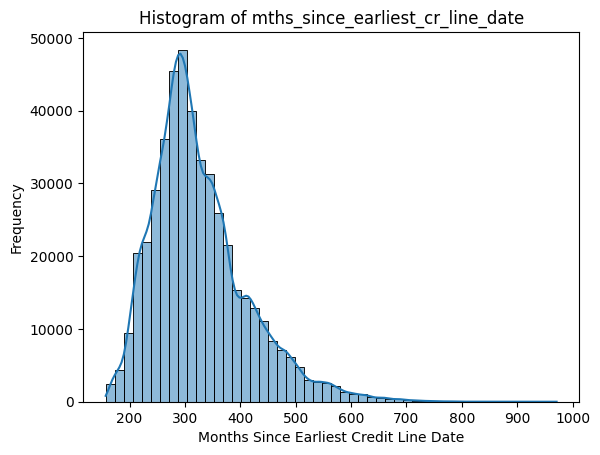

In [24]:
sns.histplot(loan_data_select_1['mths_since_earliest_cr_line_date'], bins=50, kde=True)
plt.title("Histogram of mths_since_earliest_cr_line_date")
plt.xlabel("Months Since Earliest Credit Line Date")
plt.ylabel("Frequency")
plt.show()

#### D.1.2. last_credit_pull_d

In [25]:
# Ubah string menjadi date type
loan_data_select_1['last_credit_pull_d'] = pd.to_datetime(loan_data_select_1['last_credit_pull_d'], format = '%b-%y')

# Kalkulasikan tanggal saat ini dengan tanggal pada data dan ubah menjadi numerik. Saat ini adalah Desember 2024
# calculate the difference between two dates in months, turn it to numeric datatype and round it.
loan_data_select_1['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2024-12-01') - loan_data_select_1['last_credit_pull_d']) / np.timedelta64(1, 'M')))

# hapus kolom last_credit_pull_d karena sudah tidak diperlukan
loan_data_select_1.drop(columns=['last_credit_pull_d'], axis=1, inplace=True)

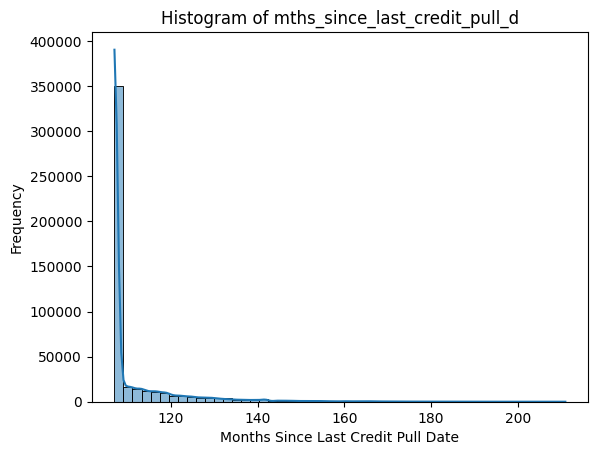

In [26]:
sns.histplot(loan_data_select_1['mths_since_last_credit_pull_d'], bins=50, kde=True)
plt.title("Histogram of mths_since_last_credit_pull_d")
plt.xlabel("Months Since Last Credit Pull Date")
plt.ylabel("Frequency")
plt.show()

### D.2. Handling Missing Values

Missing Values adalah nilai yang hilang dalam suatu data. Hal ini harus diatasi untuk memudahkan proses prediksi. Pada data, terdapat 3 tipe missing values:
1. Missing hilang di bawah 1%\
Jenis missing value ini akan diatasi dengan mengisi nilai missing dengan modus data.
2. Missing pada kolom emp_length atau lama kerja\
Karena proporsinya cukup besar, yakni 4.51%, nilai missing diisi dengan 0 tahun sebagai generalisasi.
3. Missing value sebesar 15%\
Jika baris nilai yang hilang diisi dengan nilai tertentu, maka akan merubah distribusi data. Oleh sebab itu, baris nilai yang hilang pada kelompok ini akan dihapus.


In [27]:
# Tampilan sebaran missing value
round(loan_data_select_1.isna().sum()/loan_data_select_1.shape[0]*100,2)

loan_amnt                            0.00
term                                 0.00
int_rate                             0.00
grade                                0.00
emp_length                           4.51
home_ownership                       0.00
annual_inc                           0.00
verification_status                  0.00
purpose                              0.00
addr_state                           0.00
dti                                  0.00
inq_last_6mths                       0.01
open_acc                             0.01
pub_rec                              0.01
revol_util                           0.07
total_acc                            0.01
initial_list_status                  0.00
collections_12_mths_ex_med           0.03
acc_now_delinq                       0.01
tot_cur_bal                         15.07
total_rev_hi_lim                    15.07
good_bad_loan                        0.00
mths_since_earliest_cr_line_date     0.01
mths_since_last_credit_pull_d     

#### D.2.1. Missing Under 1%

In [28]:
col_with_missing = ['inq_last_6mths','open_acc','pub_rec','revol_util','total_acc', 'collections_12_mths_ex_med',
                    'acc_now_delinq', 'mths_since_earliest_cr_line_date', 'mths_since_last_credit_pull_d']

# Mengisi nilai missing untuk setiap kolom dengan modus masing-masing
for col in col_with_missing:
    mode_value = loan_data_select_1[col].mode()[0]  # Mengambil nilai modus pertama
    loan_data_select_1[col] = loan_data_select_1[col].fillna(mode_value)

#### D.2.2. Missing at emp_length

In [29]:
# convert year to numerik
emp_map = {
    '< 1 year' : '0',
    '1 year' : '1',
    '2 years' : '2',
    '3 years' : '3',
    '4 years' : '4',
    '5 years' : '5',
    '6 years' : '6',
    '7 years' : '7',
    '8 years' : '8',
    '9 years' : '9',
    '10+ years' : '10'
}

loan_data_select_1['emp_length'] = loan_data_select_1['emp_length'].map(emp_map).fillna('0').astype(int)
loan_data_select_1['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

#### D.2.3. Missing about 15%

In [30]:
loan_data_select_1 = loan_data_select_1.dropna()

In [31]:
loan_data_select_1.isna().sum()

loan_amnt                           0
term                                0
int_rate                            0
grade                               0
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
purpose                             0
addr_state                          0
dti                                 0
inq_last_6mths                      0
open_acc                            0
pub_rec                             0
revol_util                          0
total_acc                           0
initial_list_status                 0
collections_12_mths_ex_med          0
acc_now_delinq                      0
tot_cur_bal                         0
total_rev_hi_lim                    0
good_bad_loan                       0
mths_since_earliest_cr_line_date    0
mths_since_last_credit_pull_d       0
dtype: int64

### D.3. Handling Outliers

Setelah missing values, outliers merupakan kasus umum yang ditemukan saat proses prediksi data. Outliers juga perlu diidentifikasi agar interpretasi terhadap prediksi menjadi lebih akurat. Tidak semua kasus outlier perlu dihapus atau diubah nilai, karena outlier pada taraf tertentu tidak bermasalah dalam proses prediksi. Meski demikian pada kasus ini, outlier diatasi dengan dua cara, yakni menghapus data menggunakan batas IQR dan menghapus data dengan penerapan batasan tertentu. Cara ini dipilih berdasarkan analisis bottom-up yang telah dilakukan.

#### D.3.1. Check Feature with Outliers

In [32]:
numerical_features = loan_data_select_1.describe().columns

<Figure size 2000x1500 with 0 Axes>

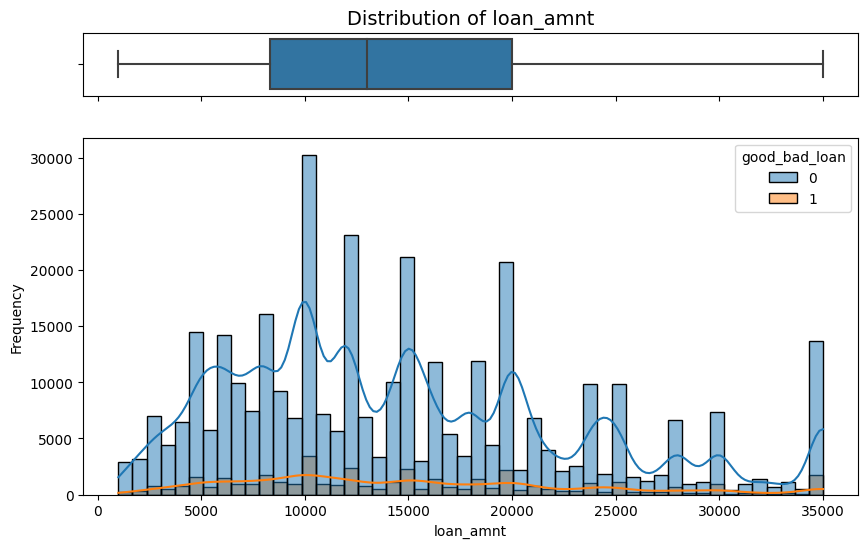

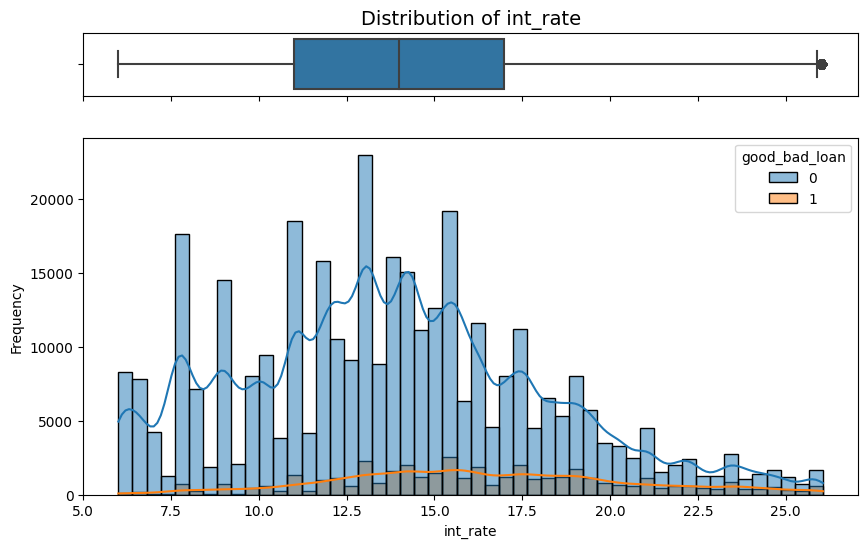

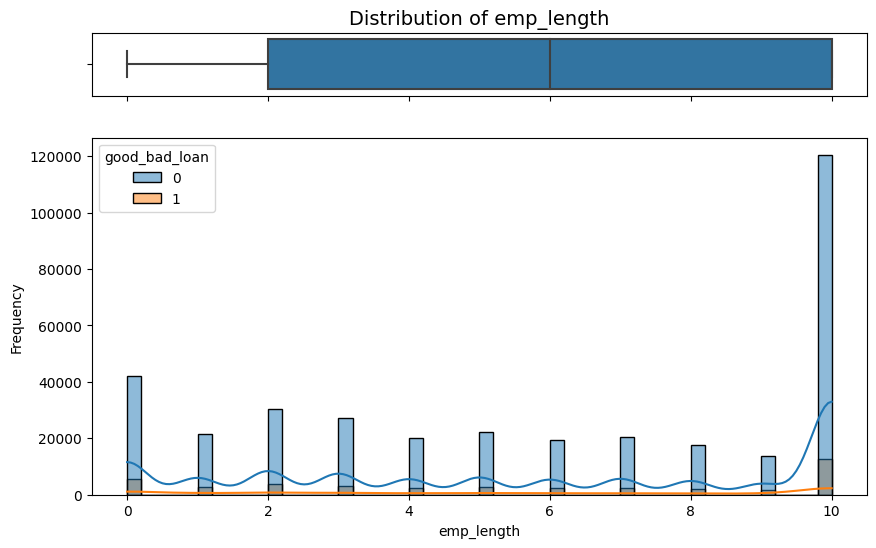

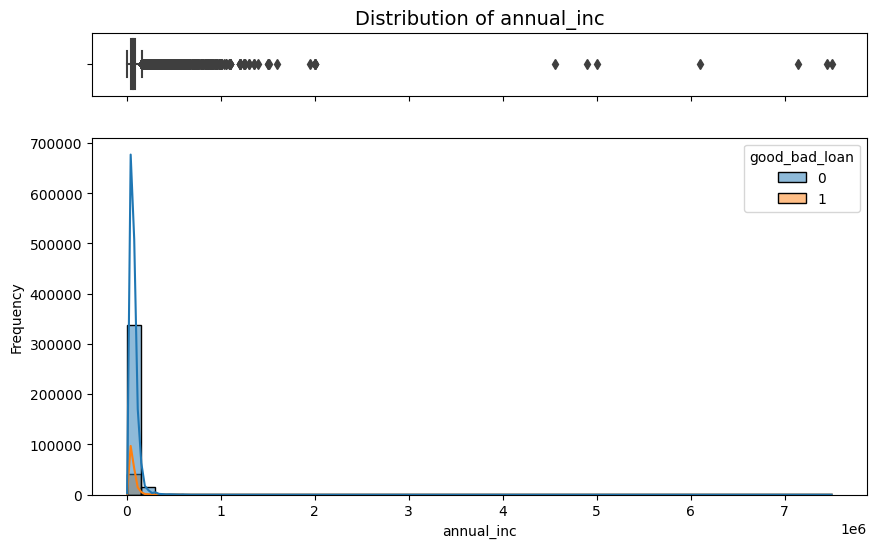

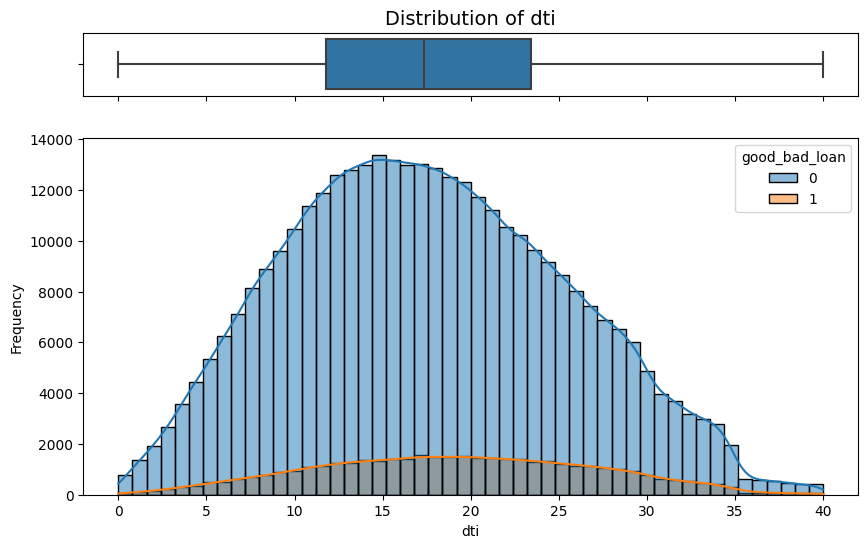

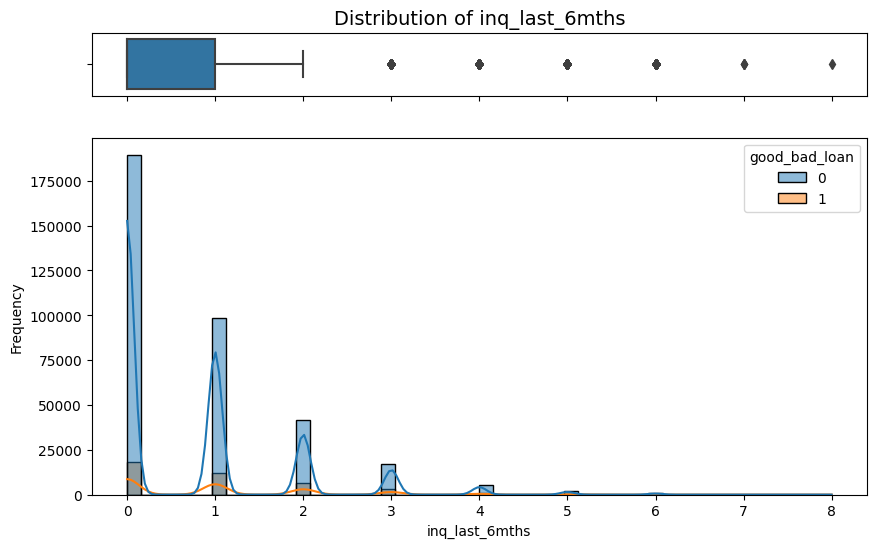

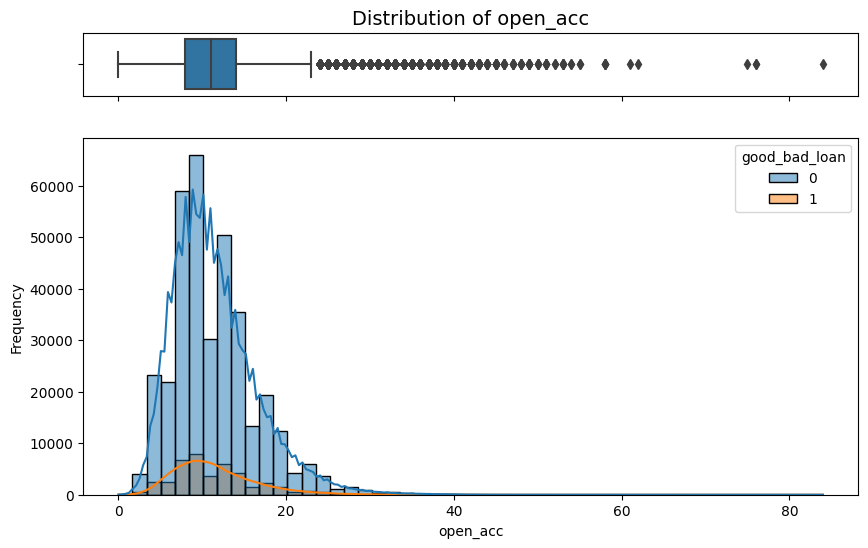

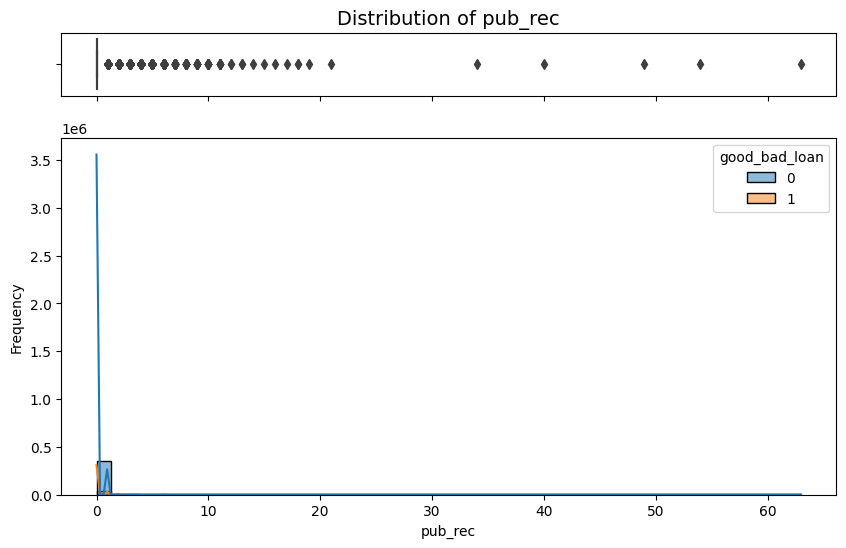

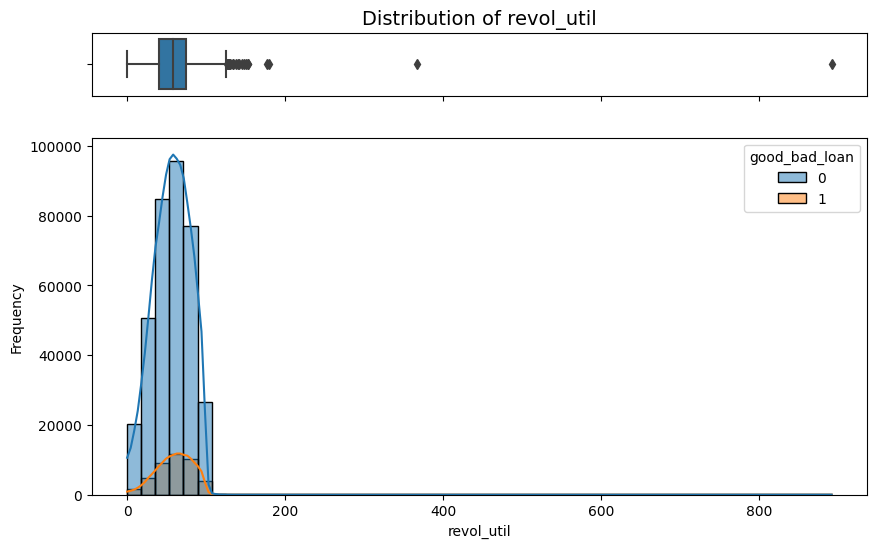

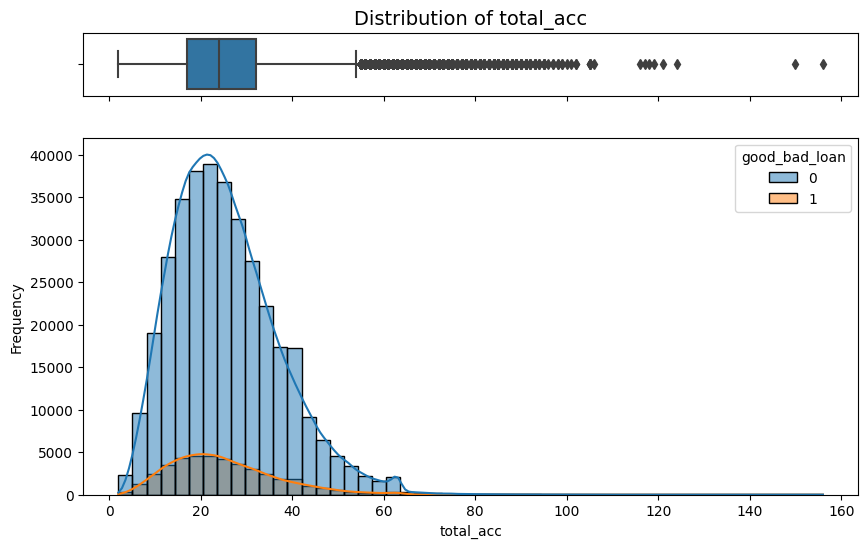

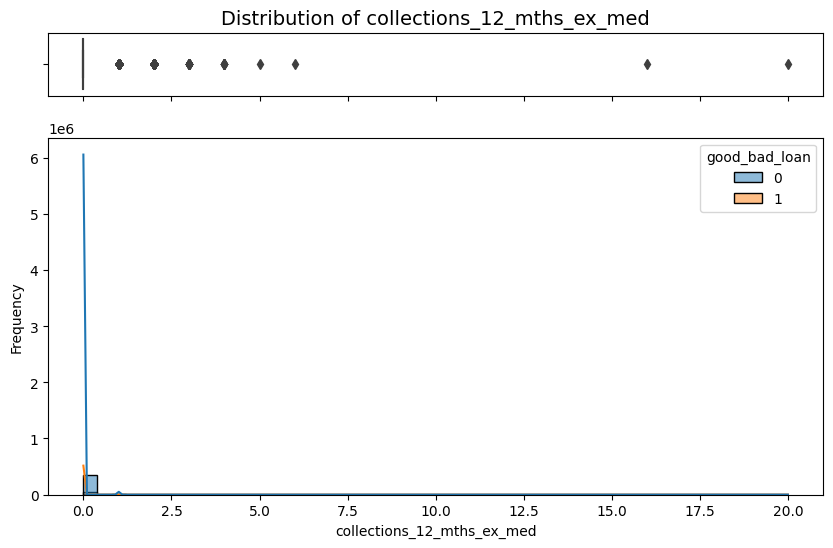

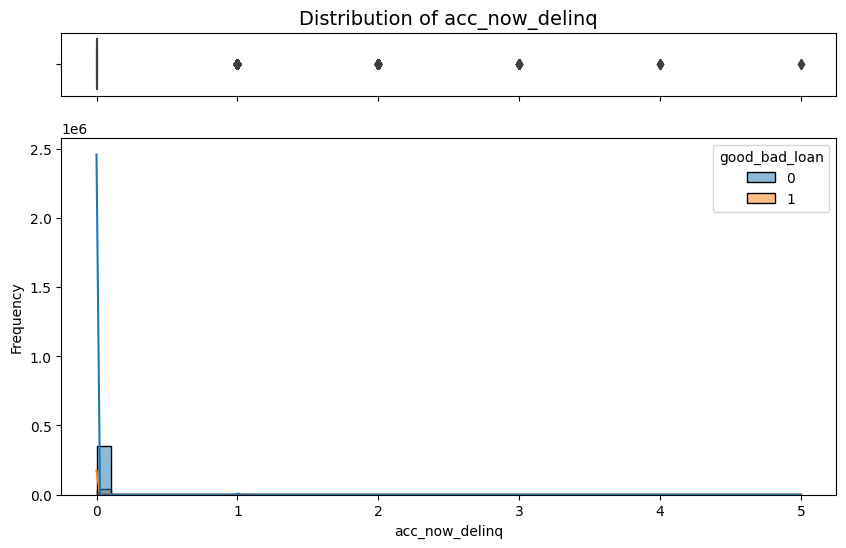

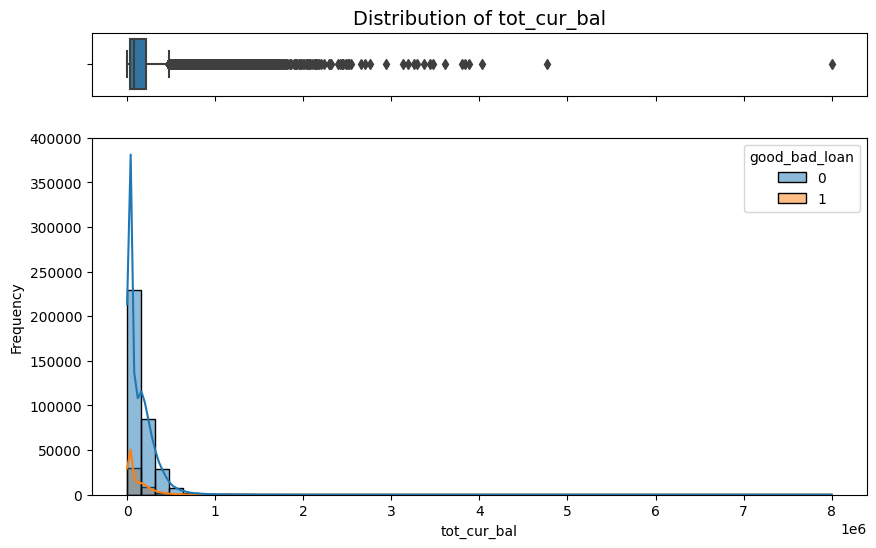

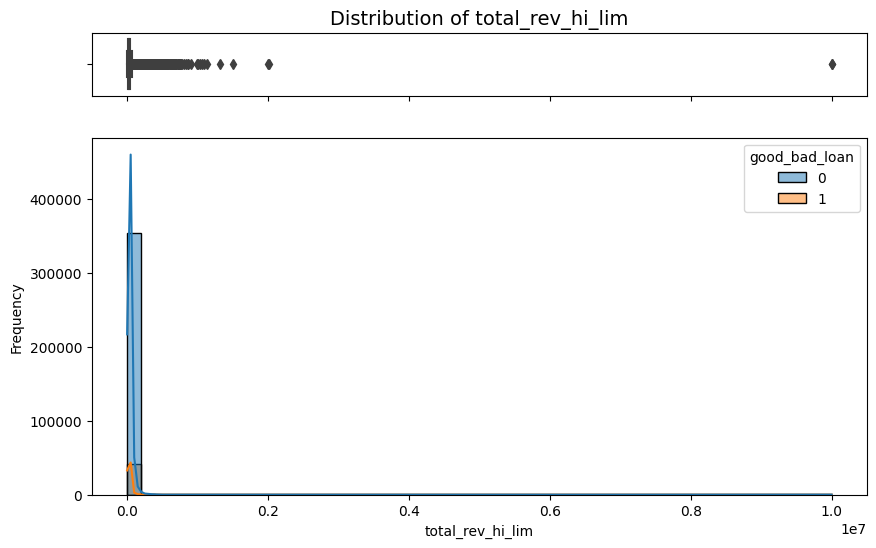

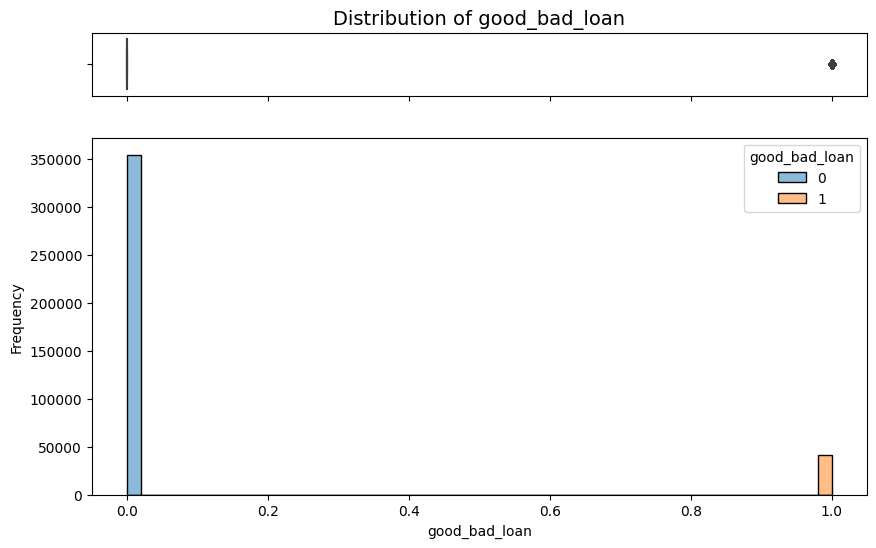

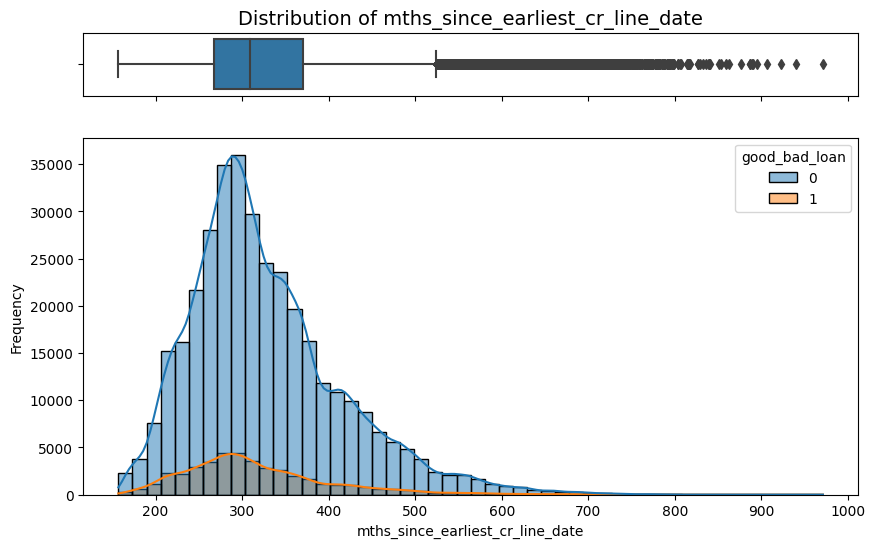

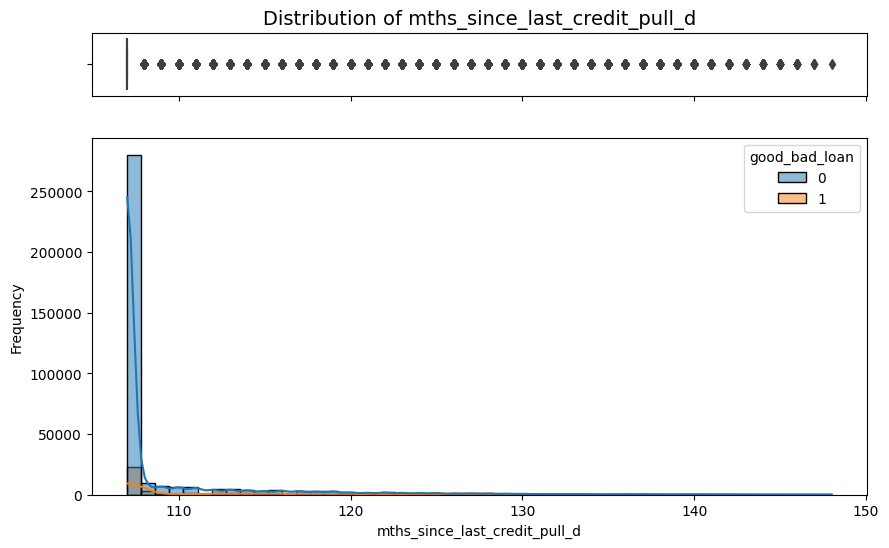

In [33]:
plt.figure(figsize=(20, 15))
for col in numerical_features:
    # Membuat subplots
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 6),
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                 "hspace": 0.2})
    
    # Boxplot
    sns.boxplot(x=loan_data_select_1[col], ax=ax1)
    ax1.set_title(f'Distribution of {col}', fontsize=14)
    ax1.set(xlabel="")

    # Histplot dengan KDE
    sns.histplot(data=loan_data_select_1, x=col, ax=ax2, hue='good_bad_loan', 
                 stat="count", kde=True, bins=50)
    ax2.set_ylabel('Frequency')
    

    plt.tight_layout()
    plt.show()

#### D.3.2. Handling Outliers Type 1: IQR

In [34]:
# Menghitung jumlah dan persentase outliers dengan metode IQR

columns_outliers = ['annual_inc', 'open_acc', 'revol_util', 'total_acc', 'tot_cur_bal', 'total_rev_hi_lim', 
                   'mths_since_earliest_cr_line_date', 'mths_since_last_credit_pull_d']

for col in columns_outliers:
    Q1 = loan_data_select_1[col].quantile(0.25)
    Q3 = loan_data_select_1[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    outliers = loan_data_select_1[(loan_data_select_1[col] < lower_bound) | (loan_data_select_1[col] > upper_bound)][col]
    print(f'Outliers pada {col} adalah {outliers.count()} atau sebesar {round(outliers.count()/loan_data_select_1.shape[0]*100,2)}%')

Outliers pada annual_inc adalah 16357 atau sebesar 4.13%
Outliers pada open_acc adalah 9897 atau sebesar 2.5%
Outliers pada revol_util adalah 22 atau sebesar 0.01%
Outliers pada total_acc adalah 7828 atau sebesar 1.98%
Outliers pada tot_cur_bal adalah 12264 atau sebesar 3.1%
Outliers pada total_rev_hi_lim adalah 21533 atau sebesar 5.44%
Outliers pada mths_since_earliest_cr_line_date adalah 12902 atau sebesar 3.26%
Outliers pada mths_since_last_credit_pull_d adalah 92799 atau sebesar 23.43%


In [35]:
loan_data_select_1.drop(columns=['mths_since_last_credit_pull_d'], axis=1, inplace=True)

In [36]:
# Menghapus Outliers

columns_outliers = ['annual_inc', 'open_acc', 'revol_util', 'total_acc', 'tot_cur_bal', 'total_rev_hi_lim', 
                   'mths_since_earliest_cr_line_date']

for col in columns_outliers:
    Q1 = loan_data_select_1[col].quantile(0.25)
    Q3 = loan_data_select_1[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    loan_data_select_1 = loan_data_select_1[(loan_data_select_1[col] >= lower_bound) & (loan_data_select_1[col] <= upper_bound)]

loan_data_select_1.reset_index(drop=True, inplace=True)

In [37]:
round((loan_data.shape[0] - loan_data_select_1.shape[0])/loan_data.shape[0]*100,2)

29.84

#### D.3.3. Handling Outlier Type 2: Limiter

In [38]:
loan_data_select_1['home_ownership'].value_counts()

MORTGAGE    157625
RENT        140049
OWN          29377
OTHER           40
NONE            37
ANY              1
Name: home_ownership, dtype: int64

In [39]:
loan_data_select_1['addr_state'].value_counts()

CA    48140
NY    27269
TX    25714
FL    22159
IL    12849
NJ    11633
PA    11473
OH    11167
GA    10383
VA     9358
NC     9328
MI     8579
AZ     7693
WA     7582
MD     7177
MA     7128
CO     6924
MN     5914
IN     5553
MO     5342
TN     5047
NV     4823
CT     4689
OR     4458
WI     4338
AL     4291
SC     4040
LA     3940
KY     3300
KS     3134
OK     3066
AR     2552
UT     2498
NM     1885
HI     1801
WV     1793
NH     1584
RI     1437
MT     1079
MS     1021
AK      937
DE      879
WY      868
DC      860
SD      759
VT      678
NE        2
IA        2
ID        2
ME        1
Name: addr_state, dtype: int64

In [40]:
# Memberikan batasan terhadap outliers ekstrim
loan_data_select_1 = loan_data_select_1[loan_data_select_1['pub_rec']<10]
loan_data_select_1 = loan_data_select_1[loan_data_select_1['collections_12_mths_ex_med']<4]
loan_data_select_1 = loan_data_select_1[loan_data_select_1['total_rev_hi_lim']<300000]
loan_data_select_1 = loan_data_select_1[loan_data_select_1['inq_last_6mths']<7]
loan_data_select_1 = loan_data_select_1[~loan_data_select_1['home_ownership'].isin(['OTHER', 'NONE', 'ANY'])]
loan_data_select_1 = loan_data_select_1[~loan_data_select_1['addr_state'].isin(['ID', 'IA', 'NE', 'ME'])]

In [41]:
round((loan_data.shape[0] - loan_data_select_1.shape[0])/loan_data.shape[0]*100,2)

29.87

### D.4. Binning Feature total_rev_hi_lim

Binning diterapkan pada feature *total_rev_hi_lim* karena persebaran data yang tidak merata di setiap nilainya.

In [42]:
loan_data_select_1['total_rev_hi_lim'].head(20)

0     59900.0
1     15100.0
2     61100.0
3      8100.0
4     15400.0
5     16200.0
6      4500.0
7      8000.0
8     22300.0
9      5300.0
10    23800.0
11    32600.0
12    10000.0
13    28200.0
14    20800.0
15    14100.0
16    25800.0
17    29700.0
18    25700.0
19    27700.0
Name: total_rev_hi_lim, dtype: float64

In [43]:
# Membuat binning dengan total 7 interval
loan_data_select_1['total_rev_hi_lim_bin'] = pd.cut(loan_data_select_1['total_rev_hi_lim'], 7)   #equal interval

# Menghapus kolom yang sudah tidak diperlukan
loan_data_select_1.drop(columns='total_rev_hi_lim', axis=1, inplace=True)

# Mengubah data type menjadi string
loan_data_select_1['total_rev_hi_lim_bin'] = loan_data_select_1['total_rev_hi_lim_bin'].astype('object')

In [44]:
loan_data_select_1['total_rev_hi_lim_bin'].value_counts().sort_index()

(-68.0, 9714.286]          52279
(9714.286, 19428.571]     101810
(19428.571, 29142.857]     74704
(29142.857, 38857.143]     45772
(38857.143, 48571.429]     27312
(48571.429, 58285.714]     15812
(58285.714, 68000.0]        9320
Name: total_rev_hi_lim_bin, dtype: int64

In [45]:
loan_data_select_1.shape

(327009, 23)

### D.5. Change Term to numeric

In [46]:
# Konversikan tipe data term menjadi numerik dan hilangkan spasi berlebih
loan_data_select_1['term'] = pd.to_numeric(loan_data_select_1['term'].str.replace(' months', ''))
loan_data_select_1['term'].value_counts()

36    237076
60     89933
Name: term, dtype: int64

### D.6. Train Test Split

In [47]:
X = loan_data_select_1.drop(columns='good_bad_loan', axis=1)
y = loan_data_select_1['good_bad_loan']

In [48]:
# Split data untuk evaluasi akhir
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=2020,
    stratify=y
)

display(X_trainval.shape, X_test.shape)

(277957, 22)

(49052, 22)

In [49]:
# Split data untuk pemilihan model terbaik
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, 
    y_trainval, 
    test_size=49065, 
    random_state=2020, 
    stratify=y_trainval
)

display(X_train.shape, X_val.shape)

(228892, 22)

(49065, 22)

In [50]:
training = pd.concat([X_train, y_train], axis=1).copy()
training['group'] = 'Train'

validasi = pd.concat([X_val, y_val], axis=1).copy()
validasi['group'] = 'Val'

In [51]:
training['good_bad_loan'].value_counts()/training.shape[0]

0    0.890818
1    0.109182
Name: good_bad_loan, dtype: float64

In [52]:
validasi['good_bad_loan'].value_counts()/validasi.shape[0]

0    0.890818
1    0.109182
Name: good_bad_loan, dtype: float64

In [53]:
df_modelling = pd.concat([training, validasi], axis=0).copy()
df_modelling.shape

(277957, 24)

### D.7. EDA for Modelling

EDA kali ini ditujukan untuk secara spesifik mengeliminasi feature tertentu agar didapatkan model terbaik. Ada dua cara yang ditetapkan, yakni:
1. Melihat perbedaan signifikansi antara data default dan non-default pada setiap feature
2. Melihat kontribusi feature terhadap data default

#### D.7.1.  Uji Statistik Mann-Whitney

In [54]:
#Numerik
bad_loan = df_modelling[df_modelling['good_bad_loan'] == 1]
good_loan = df_modelling[df_modelling['good_bad_loan'] == 0]

mean_test_results = {}

# Loop through columns and perform Mann-Whitney U test
for column in df_modelling.select_dtypes(include=['float64', 'int64', 'int32']):
    if column != 'good_bad_loan':
        stat, p = mannwhitneyu(bad_loan[column], good_loan[column])
        mean_test_results[column] = p

# Create DataFrame from mean test results
mean_test_df = pd.DataFrame(mean_test_results.items(), columns=['Feature', 'p-value'])

# Add interpretation column
alpha = 0.05
mean_test_df['Interpretation'] = mean_test_df['p-value'].apply(lambda x: 'Significant' if x < alpha else 'Not significant')

# Display the DataFrame
mean_test_df


,Feature,p-value,Interpretation
0,loan_amnt,4.660410e-46,Significant
1,term,2.436450e-204,Significant
2,int_rate,0.000000e+00,Significant
3,emp_length,2.676819e-24,Significant
4,annual_inc,4.885823e-208,Significant
5,dti,6.185212e-233,Significant
6,inq_last_6mths,9.430541e-235,Significant
7,open_acc,5.207283e-12,Significant
8,pub_rec,1.450566e-09,Significant
9,revol_util,5.866665e-116,Significant


In [55]:
#Kategorik
chi_square_results = {}

# Loop and perform chi-square test
for column in df_modelling.drop('group', axis=1).select_dtypes(include=['object']).columns:
    contingency_table = pd.crosstab(df_modelling[column], df_modelling['good_bad_loan'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[column] = {'Chi-square': chi2, 'p-value': p}

# Create DataFrame from chi-square test results
chi_square_results_df = pd.DataFrame(chi_square_results).T

# Add interpretation column based on significance level (alpha)
alpha = 0.05
chi_square_results_df['Interpretation'] = chi_square_results_df['p-value'].apply(lambda x: 'Significant' if x < alpha else 'Not significant')

# Display the DataFrame
chi_square_results_df


,Chi-square,p-value,Interpretation
grade,7465.745281,0.000000e+00,Significant
home_ownership,415.162575,7.056546e-91,Significant
verification_status,896.902728,1.737990e-195,Significant
purpose,642.922945,7.150004e-130,Significant
addr_state,345.004587,7.155101e-48,Significant
initial_list_status,285.198259,5.531487e-64,Significant
total_rev_hi_lim_bin,399.181303,4.192601e-83,Significant


#### Overviews:
1. Terdapat dua feature yang tidak berbeda secara signifikan antara default dan non-default-nya.
2. Feature tersebut akan dieliminasi sebagai berikut.

In [56]:
# Drop kolom yang tidak signifikan
df_modelling = df_modelling.drop(['collections_12_mths_ex_med', 'acc_now_delinq'], axis=1)
X_train = X_train.drop(['collections_12_mths_ex_med', 'acc_now_delinq'], axis=1)
X_val = X_val.drop(['collections_12_mths_ex_med', 'acc_now_delinq'], axis=1)
X_test = X_test.drop(['collections_12_mths_ex_med', 'acc_now_delinq'], axis=1)

df_modelling.shape

(277957, 22)

#### D.7.2. Kontribusi Feature Terhadap Data Default

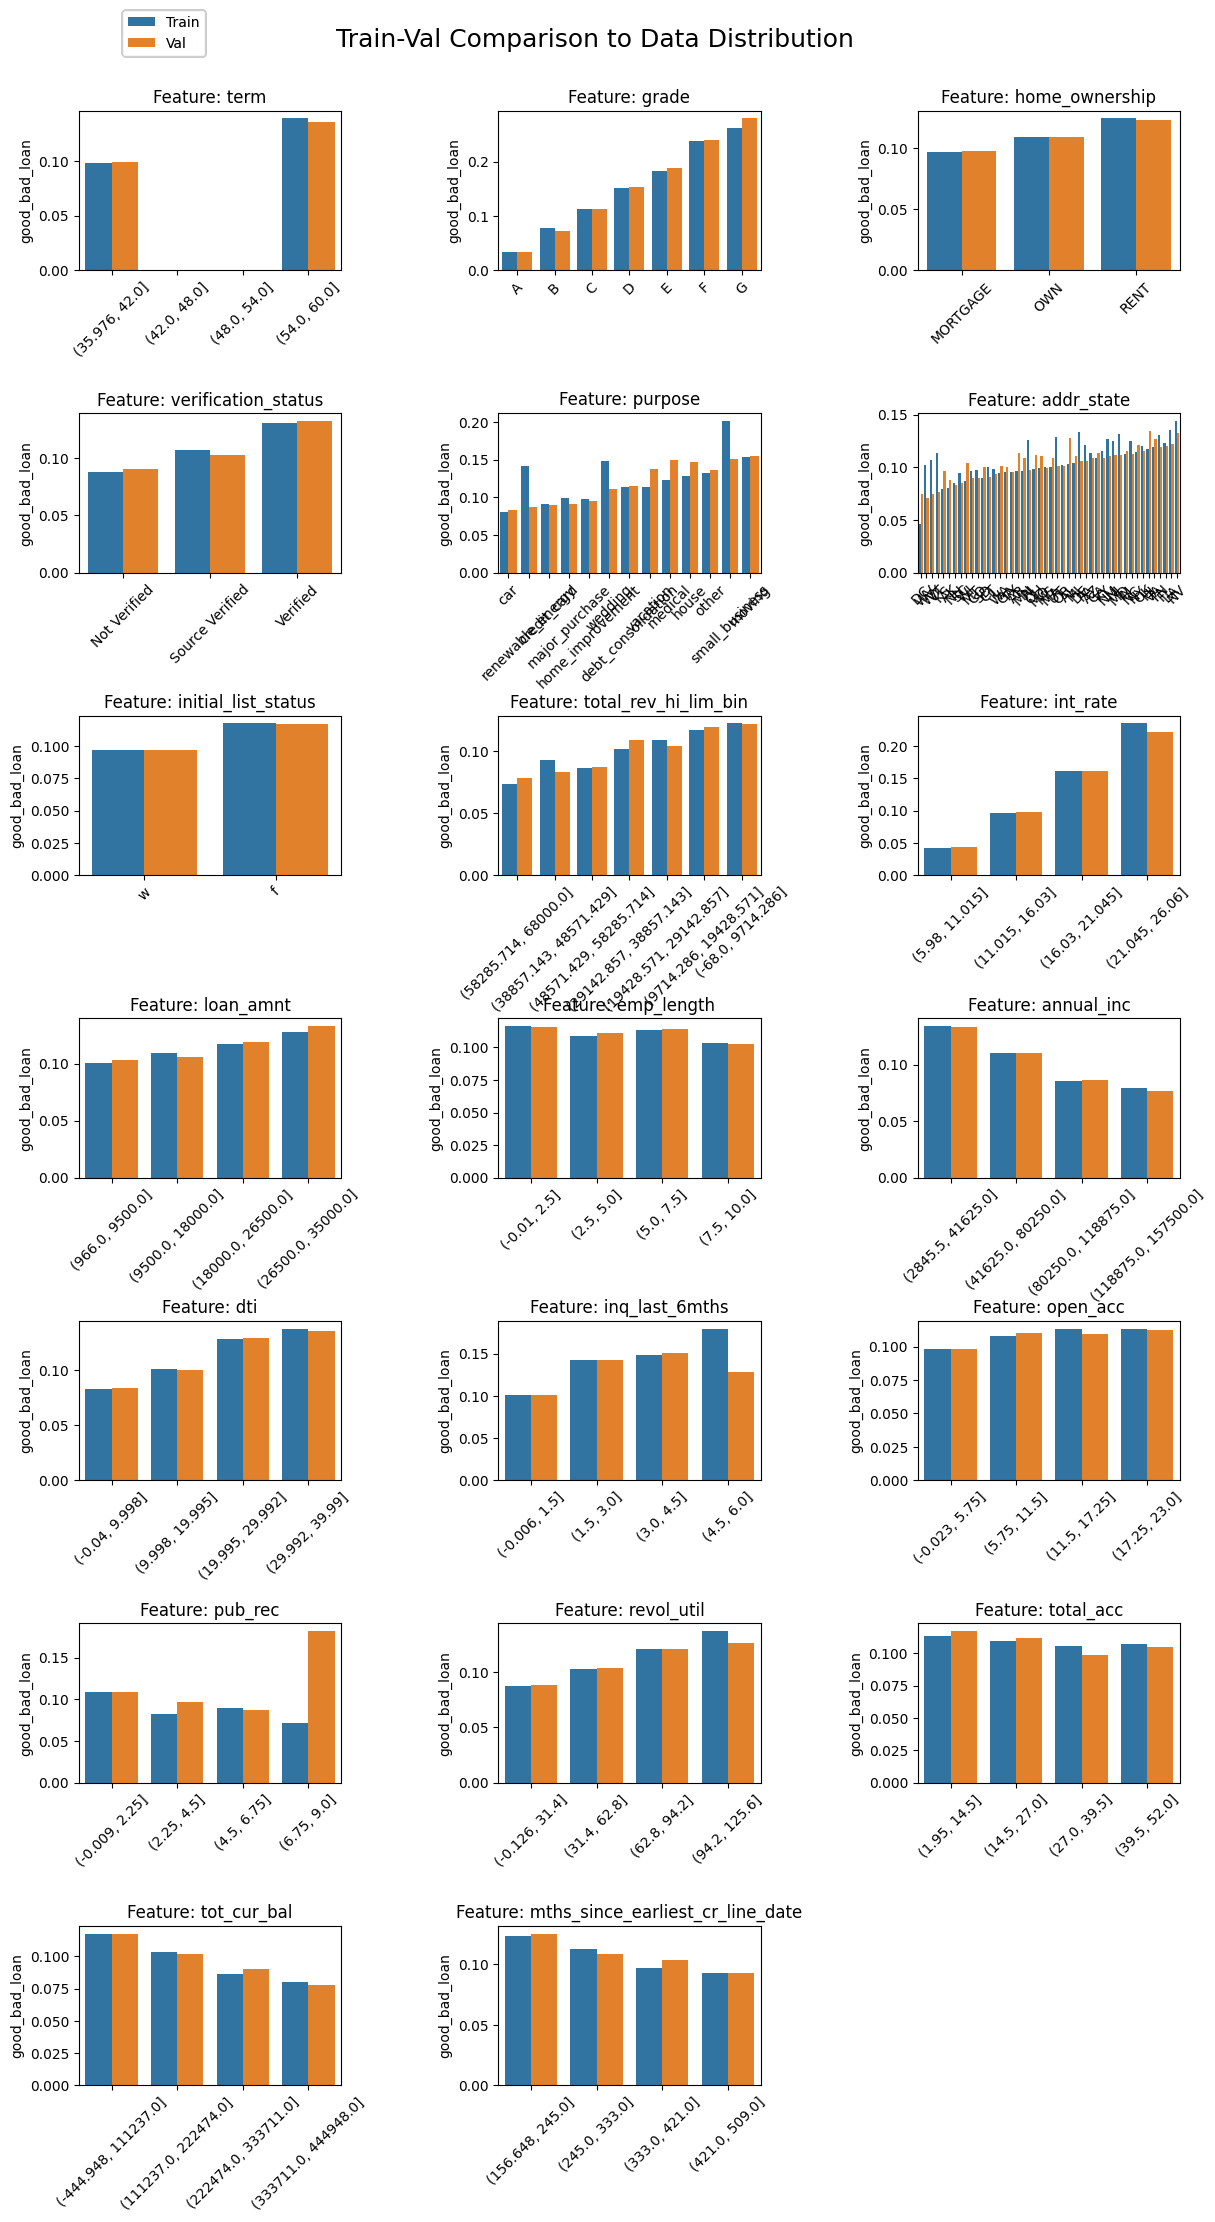

In [57]:
category = ['grade', 'home_ownership', 'verification_status', 'purpose',
            'addr_state', 'initial_list_status', 'total_rev_hi_lim_bin']
numeric = ['term', 'int_rate', 'loan_amnt', 'emp_length', 'annual_inc', 'dti',
           'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
           'tot_cur_bal', 'mths_since_earliest_cr_line_date']
columns = ['term', 'grade', 'home_ownership', 'verification_status', 'purpose',
           'addr_state', 'initial_list_status', 'total_rev_hi_lim_bin',
           'int_rate', 'loan_amnt', 'emp_length', 'annual_inc', 'dti',
           'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
           'tot_cur_bal', 'mths_since_earliest_cr_line_date']

plt.figure(figsize=(12, 25))

for i, col in enumerate(columns, start=1):
    plt.subplot(8, 3, i)
    if col in numeric:
        df_modelling['bin'] = pd.cut(df_modelling[col], 4)   
        df1 = df_modelling.groupby(['group', 'bin'])['good_bad_loan'].mean().reset_index()

        sns.barplot(x='bin', y='good_bad_loan', data=df1, hue='group')
        plt.title(f'Feature: {col}')
        plt.xlabel('')
        plt.xticks(rotation=45)
        plt.legend(loc='upper left', bbox_to_anchor=(0.1, 0.96), bbox_transform=plt.gcf().transFigure)
        plt.tight_layout()
        
    elif col in category:
        df1 = df_modelling.groupby(['group',col])['good_bad_loan'].mean().reset_index() 
        df1 = df1.sort_values(by='good_bad_loan', ascending=True) 
        sns.barplot(x=col, y='good_bad_loan', data=df1, hue='group')
        plt.xticks(rotation=45)
        plt.xlabel('')
        plt.legend(loc='upper left', bbox_to_anchor=(0.1, 0.96), bbox_transform=plt.gcf().transFigure)
        plt.title(f'Feature: {col}')  

plt.suptitle('Train-Val Comparison to Data Distribution', x=0.5, y=0.95, fontsize=18)
plt.subplots_adjust(wspace=0.6, hspace=0.9)
plt.show()



#### Overviews:
1. Cara membaca grafik di atas adalah sebagai berikut.
    - Term 60 lebih cenderung default dibandingkan term 36
    - Grade G lebih berpotensi default dibandingkan grade A
    - dan sebagainya
2. Terdapat feature yang tidak menunjukkan pola yang jelas seperti emp_length, open_acc, dan sebagainya. Feature tersebut akan dieliminasi.

In [58]:
feature_selected = ['term', 'grade', 'home_ownership', 'verification_status','purpose', 'addr_state', 'initial_list_status',
                    'total_rev_hi_lim_bin', 'int_rate', 'loan_amnt', 'annual_inc', 'dti','revol_util', 'tot_cur_bal',
                    'mths_since_earliest_cr_line_date']

X_trainval = X_trainval[feature_selected]
X_train = X_train[feature_selected]
X_val = X_val[feature_selected]
X_test = X_test[feature_selected]

In [59]:
X_trainval.shape

(277957, 15)

Berikut adalah feature-feature yang akan diteruskan ke dalam modelling data.

In [60]:
display(X_trainval.describe().T, X_trainval.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
term,277957.0,42.592646,10.712653,36.0,36.00,36.00,60.00,60.00
int_rate,277957.0,14.263324,4.305609,6.0,11.14,14.09,16.99,26.06
loan_amnt,277957.0,13755.600057,7709.601924,1000.0,8000.00,12000.00,18300.00,35000.00
annual_inc,277957.0,64250.371793,27803.112149,3000.0,44000.00,60000.00,80000.00,157500.00
dti,277957.0,17.793698,7.844665,0.0,11.91,17.43,23.43,39.99
revol_util,277957.0,57.706045,22.607110,0.0,41.70,58.90,75.20,125.60
tot_cur_bal,277957.0,109605.661872,105641.783188,0.0,25298.00,61909.00,177552.00,444948.00
mths_since_earliest_cr_line_date,277957.0,310.028760,71.552791,157.0,260.00,300.00,353.00,509.00


,count,unique,top,freq
grade,277957,7,B,81250
home_ownership,277957,3,MORTGAGE,133931
verification_status,277957,3,Verified,96101
purpose,277957,13,debt_consolidation,169296
addr_state,277957,46,CA,40851
initial_list_status,277957,2,f,164959
total_rev_hi_lim_bin,277957,7,"(9714.286, 19428.571]",86609


### D.8. Transformer

Machine Learning hanya dapat membaca angka. Oleh sebab itu, data teks akan dikondisikan menjadi angka melalui proses transformation data sebagai berikut.

In [61]:
ordinal_mapping = [
    {"col": "grade", "mapping": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F":6, "G": 7}},
    {"col": "total_rev_hi_lim_bin",
     "mapping": {"(9714.286, 19428.571]": 1,
                 "(19428.571, 29142.857]": 2,
                 "(-68.0, 9714.286]": 3,
                 "(29142.857, 38857.143]": 4,
                 "(38857.143, 48571.429]": 5,
                 "(48571.429, 58285.714]": 6,
                 "(58285.714, 68000.0]": 7}}
]

transformer = ColumnTransformer([
    ('One Hot Encoding', OneHotEncoder(drop='first'), ['verification_status', 'initial_list_status', 'home_ownership']),
    ('Binary Encoder', ce.BinaryEncoder(), ['purpose', 'addr_state']),
    ('Ordinal Encoding', ce.OrdinalEncoder(mapping=ordinal_mapping), ['grade', 'total_rev_hi_lim_bin']),
    ('Robust', RobustScaler(), ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util', 'tot_cur_bal',
                                'mths_since_earliest_cr_line_date']),
], remainder='passthrough')


In [62]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot Encoding',
                                 OneHotEncoder(drop='first'),
                                 ['verification_status', 'initial_list_status',
                                  'home_ownership']),
                                ('Binary Encoder', BinaryEncoder(),
                                 ['purpose', 'addr_state']),
                                ('Ordinal Encoding',
                                 OrdinalEncoder(mapping=[{'col': 'grade',
                                                          'data_type': dtype('O'),
                                                          'mapping': A    1
B    2
C    3
D    4
E    5
F    6
G    7
dtype: int64},
                                                         {'col':...
                                                          'data_type': dtype('O'),
                                                          'mapping': (9714.286, 19428.571]     1
(19428.571, 29142.857]    2
(-68.0, 9714.286]         3
(29142.857, 38857.143]    4
(38857.143, 48571.429]    5
(48571.429, 58285.714]    6
(58285.714, 68000.0]      7
dtype: int64}]),
                                 ['grade', 'total_rev_hi_lim_bin']),
                                ('Robust', RobustScaler(),
                                 ['loan_amnt', 'int_rate', 'annual_inc', 'dti',
                                  'revol_util', 'tot_cur_bal',
                                  'mths_since_earliest_cr_line_date'])])

In [63]:
test = X_train.copy()

In [64]:
validating = pd.DataFrame(transformer.fit_transform(test), columns=transformer.get_feature_names_out())
validating.columns

Index(['One Hot Encoding__verification_status_Source Verified',
       'One Hot Encoding__verification_status_Verified',
       'One Hot Encoding__initial_list_status_w',
       'One Hot Encoding__home_ownership_OWN',
       'One Hot Encoding__home_ownership_RENT', 'Binary Encoder__purpose_0',
       'Binary Encoder__purpose_1', 'Binary Encoder__purpose_2',
       'Binary Encoder__purpose_3', 'Binary Encoder__addr_state_0',
       'Binary Encoder__addr_state_1', 'Binary Encoder__addr_state_2',
       'Binary Encoder__addr_state_3', 'Binary Encoder__addr_state_4',
       'Binary Encoder__addr_state_5', 'Ordinal Encoding__grade',
       'Ordinal Encoding__total_rev_hi_lim_bin', 'Robust__loan_amnt',
       'Robust__int_rate', 'Robust__annual_inc', 'Robust__dti',
       'Robust__revol_util', 'Robust__tot_cur_bal',
       'Robust__mths_since_earliest_cr_line_date', 'remainder__term'],
      dtype='object')

In [65]:
validating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228892 entries, 0 to 228891
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   One Hot Encoding__verification_status_Source Verified  228892 non-null  float64
 1   One Hot Encoding__verification_status_Verified         228892 non-null  float64
 2   One Hot Encoding__initial_list_status_w                228892 non-null  float64
 3   One Hot Encoding__home_ownership_OWN                   228892 non-null  float64
 4   One Hot Encoding__home_ownership_RENT                  228892 non-null  float64
 5   Binary Encoder__purpose_0                              228892 non-null  float64
 6   Binary Encoder__purpose_1                              228892 non-null  float64
 7   Binary Encoder__purpose_2                              228892 non-null  float64
 8   Binary Encoder__purpose_3         

## E. MODELLING

### E.1. Modelling Benchmark

Terdapat 8 model yang akan diuji sebagai berikut.

In [66]:
# Model-model yang akan diseleksi
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=2020) 
rf = RandomForestClassifier(random_state=2020) 
ada = AdaBoostClassifier(tree, random_state=2020)
gbc = GradientBoostingClassifier(random_state=2020)
xgb = XGBClassifier(random_state=2020)
lgbm = LGBMClassifier(random_state=2020)
lr = LogisticRegression(random_state=2020)

In [67]:
# Model Seleksi pada data train menggunakan cross_val_score
models = [ knn, tree, rf, ada, gbc,xgb,lgbm, lr]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost', 'XGBoost', 'LightGBM', 'LogReg']
score = []
mean = []
std = []

for model in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator_default = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    model_cv = cross_val_score(estimator_default, X_train, y_train, cv=skfold, scoring='f1', n_jobs=-1)
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

results_df = pd.DataFrame({
    'model': model_names,
    'mean f1 score': mean,
    'StdDev': std
}).set_index('model').sort_values(by='mean f1 score', ascending=False)

results_df.round(3)


,mean f1 score,StdDev
model,,
AdaBoost,0.153,0.006
Decision Tree,0.153,0.006
KNN,0.061,0.004
XGBoost,0.005,0.001
Random Forest,0.001,0.000
GBoost,0.000,0.000
LightGBM,0.000,0.000
LogReg,0.000,0.000


In [68]:
# Tes model selection dengan data validasi
models = [ knn, tree, rf, ada, gbc,xgb,lgbm, lr]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost', 'XGBoost', 'LightGBM', 'LogReg']
Score_F1 = []

def y_pred_func(model):
    estimator_default = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    estimator_default.fit(X_train, y_train)
    y_pred = estimator_default.predict(X_val)
    return y_pred

for model, model_name in zip(models, model_names):
    y_pred = y_pred_func(model)
    f1 = f1_score(y_val, y_pred)
    Score_F1.append(f1)
    print(f"{model_name} \n{classification_report(y_val, y_pred)}")

results_df = pd.DataFrame({
    'Model': model_names,
    'f1 score': Score_F1
}).sort_values(by='f1 score', ascending=False)

results_df.round(3)


KNN 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     43708
           1       0.18      0.03      0.06      5357

    accuracy                           0.88     49065
   macro avg       0.54      0.51      0.50     49065
weighted avg       0.81      0.88      0.84     49065

Decision Tree 
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     43708
           1       0.14      0.17      0.15      5357

    accuracy                           0.80     49065
   macro avg       0.52      0.52      0.52     49065
weighted avg       0.81      0.80      0.80     49065

Random Forest 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     43708
           1       0.17      0.00      0.00      5357

    accuracy                           0.89     49065
   macro avg       0.53      0.50      0.47     49065
weighted avg       0.81      0.89      

,Model,f1 score
1,Decision Tree,0.154
3,AdaBoost,0.152
0,KNN,0.058
5,XGBoost,0.006
2,Random Forest,0.000
4,GBoost,0.000
6,LightGBM,0.000
7,LogReg,0.000


#### Overviews:
1. Berdasarkan hasil seleksi pada tabel, baik data train maupun data validation, tidak terdapat overfit maupun underfit karena resultnya sama sekitar 0.15.
2. Hasil 0.15 merupakan hasil yang buruk untuk sebuah prediksi. Mungkin data yang dikerjakan memang sulit untuk diprediksi.
3. Projek harus tetap dilanjutkan dan masih ada cara-cara tertentu untuk memperbaiki performa model, yakni dengan teknik oversampling dan hyperparameter tuning.
4. Berdasarkan 7 model yang diseleksi, model Decision Tree dan Ada Boost merupakan yang terbaik.

#### Decision Tree Definition:
A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.\
Source: https://www.ibm.com/think/topics/decision-trees

#### Adaboost Definition:
The AdaBoost algorithm is a widely used machine learning algorithm that combines many weak classifiers to form a strong classifier by adjusting the weights of training samples.\
Source:https://www.sciencedirect.com/topics/computer-science/adaboost-algorithm

### E.2. Oversampling Technique

Ketidakseimbangan kelas merupakan hal umum yang terjadi pada data prediksi. Membiarkan hal ini dapat mendorong machine learning bias pada kelas mayoritas dan berakhir pada kasus overfit dan underfit. Menyeimbangkan setiap kelas menjadi salah satu cara untuk memperbaiki performa sebuah model. Pada kasus kali ini, teknik Smote dan Ros akan digunakan karena merupakan teknik yang populer.

In [69]:
# Import oversampling method
Smote = SMOTE(random_state = 2020)
Ros = RandomOverSampler(random_state=2020)

In [70]:
Oversampler_Selection = [Smote, Ros, None]
model_names = ['tree_smote', 'tree_ros', 'tree']

score = []
mean = []
std = []

for i in Oversampler_Selection:
    skfold=StratifiedKFold(n_splits=5)
    estimator_tuning =Pipeline([
        ('preprocess',transformer),
        ('resampler',i),
        ('model',tree)])
    model_cv = cross_val_score(estimator_tuning, X_train, y_train, cv=skfold, scoring='f1')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())
        
results_df = pd.DataFrame({
    'model': model_names,
    'mean f1 Score': mean,
    'StdDev': std
}).set_index('model').sort_values(by='mean f1 Score', ascending=False)

results_df.round(3)

,mean f1 Score,StdDev
model,,
tree_smote,0.170,0.003
tree,0.153,0.006
tree_ros,0.149,0.006


In [71]:
Oversampler_Selection = [Smote, Ros, None]
model_names = ['ADA_smote', 'ADA_ros', 'ADABoost']

score = []
mean = []
std = []

for i in Oversampler_Selection:
    skfold=StratifiedKFold(n_splits=5)
    estimator_tuning =Pipeline([
        ('preprocess',transformer),
        ('resampler',i),
        ('model',ada)])
    model_cv = cross_val_score(estimator_tuning, X_train, y_train, cv=skfold, scoring='f1')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())
        
results_df = pd.DataFrame({
    'model': model_names,
    'mean recall Score': mean,
    'StdDev': std
}).set_index('model').sort_values(by='mean recall Score', ascending=False)

results_df.round(3)

,mean recall Score,StdDev
model,,
ADA_smote,0.169,0.003
ADABoost,0.153,0.006
ADA_ros,0.149,0.005


#### Overviews:
1. Baik Decision Tree maupun Ada Boost, teknik oversampling Smote dapat memperbaiki performa model dari 0.15 menjadi lebih dari 0.16
2. Model Decision Tree memberikan model terbaik dengan nilai 0.17
3. Meskipun perbedaan score antara Decision Tree dengan Adabost tidak terlalu signifikan, namun model Decision Tree akan tetap dipilih untuk dilakukan Hyperparameter Tuning

### E.3. Hyperparameter Tuning

In [72]:
estimator = Pipeline([
    ('preprocess', transformer),
    ('resampler',Smote),
    ('model', tree)])

hyperparam_space = {
    'model__criterion': ['gini', 'entropy', 'log_loss'],  # Fungsi untuk mengukur kualitas split
    'model__max_depth': [None, 5, 10, 20, 30],            # Maksimal kedalaman pohon
    'model__min_samples_split': [2, 5, 10, 20],           # Minimal jumlah sampel untuk split
    'model__min_samples_leaf': [1, 2, 5, 10],             # Minimal jumlah sampel di setiap leaf node
    'model__max_features': [None, 'sqrt', 'log2'],        # Jumlah fitur yang dipertimbangkan untuk split
    'model__splitter': ['best', 'random'],                # Strategi split node
}

random_search_tree = RandomizedSearchCV(
    estimator=estimator, 
    param_distributions=hyperparam_space, 
    n_iter=50,
    cv=skfold,
    scoring='f1',
    n_jobs=-1,
    random_state=2020
)


In [73]:
random_search_tree.fit(X_trainval, y_trainval)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot '
                                                                               'Encoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['verification_status',
                                                                                'initial_list_status',
                                                                                'home_ownership']),
                                                                              ('Binary '
                                                                               'Encoder',
                                                                               BinaryEncoder(),
                                                                               ['purpose',
                                                                                'addr_state'...
                                              DecisionTreeClassifier(random_state=2020))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__criterion': ['gini', 'entropy',
                                                             'log_loss'],
                                        'model__max_depth': [None, 5, 10, 20,
                                                             30],
                                        'model__max_features': [None, 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 5,
                                                                    10],
                                        'model__min_samples_split': [2, 5, 10,
                                                                     20],
                                        'model__splitter': ['best', 'random']},
                   random_state=2020, scoring='f1')

#### Overviews:
Setelah dilakukan Hyperparameter tuning, score berhasil ditingkatkan menjadi 0.25. Score tersebut masih terbilang buruk untuk sebuah mesin prediksi. Dengan kata lain, mungkin memang data yang didapatkan sulit untuk dipresiksi menggunakan Machine Learning. Meski demikian, kita akan mulai mengevaluasi machine learning yang telah dikerjakan dengan menguji pada data test yang sudah disiapkan dengan parameter model tree sebagai berikut.

In [74]:
print('best score',random_search_tree.best_score_)
print('best param',random_search_tree.best_params_)

best score 0.25908249108421566
best param {'model__splitter': 'best', 'model__min_samples_split': 20, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 5, 'model__criterion': 'gini'}


In [ ]:
{'model__splitter': 'best',         # Strategi split node
 'model__min_samples_split': 20,    # Minimal jumlah sampel untuk split
 'model__min_samples_leaf': 1,      # Minimal jumlah sampel di setiap leaf node
 'model__max_features': 'sqrt',     # Jumlah fitur yang dipertimbangkan untuk split
 'model__max_depth': 5,             # Maksimal kedalaman pohon
 'model__criterion': 'gini'}        # Fungsi untuk mengukur kualitas split

## F. EVALUATION

### F.1. Evaluation Through Data Test

In [75]:
best_model_tree = random_search_tree.best_estimator_
best_model_tree.fit(X_trainval, y_trainval)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['verification_status',
                                                   'initial_list_status',
                                                   'home_ownership']),
                                                 ('Binary Encoder',
                                                  BinaryEncoder(),
                                                  ['purpose', 'addr_state']),
                                                 ('Ordinal Encoding',
                                                  OrdinalEncoder(mapping=[{'col': 'grade',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': A    1
B    2...
(48571.429, 58285.714]    6
(58285.714, 68000.0]      7
dtype: int64}]),
                                                  ['grade',
                                                   'total_rev_hi_lim_bin']),
                                                 ('Robust', RobustScaler(),
                                                  ['loan_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'revol_util', 'tot_cur_bal',
                                                   'mths_since_earliest_cr_line_date'])])),
                ('resampler', SMOTE(random_state=2020)),
                ('model',
                 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                                        min_samples_split=20,
                                        random_state=2020))])

In [76]:
y_pred = best_model_tree.predict(X_test)
f1_score_tree = f1_score(y_test, y_pred)
print('f1 Score tree Tuned: ', f1_score_tree)

f1 Score tree Tuned:  0.24577968526466382


### F.2. Classification Report

In [77]:
report_tree_model = classification_report(y_test, y_pred)
print('Classification Report f1 score tree model : \n', report_tree_model)

Classification Report f1 score tree model : 
               precision    recall  f1-score   support

           0       0.93      0.56      0.70     43696
           1       0.15      0.64      0.25      5356

    accuracy                           0.57     49052
   macro avg       0.54      0.60      0.47     49052
weighted avg       0.84      0.57      0.65     49052



#### Overviews:
1. Berdasarkan Classification report di atas, terlihat bahwa memang f1 score konsisten di angka 0.25 setelah melalui Hyperparameter tuning.
2. Precision menjadi metric terburuk dengan angka 0.15, sedangkan recall menjadi yang terbaik di angka 0.64.
3. Meski demikian, model prediksi ini tetap tidak dapat digunakan karena performanya yang belum mendukung. Untuk lebih jelas, perhatikan confusion metric berikut.

### F.3. Confussion Metrics

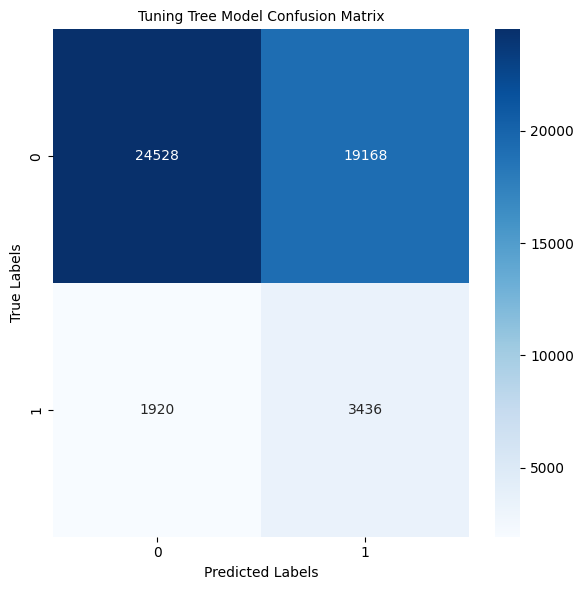

In [78]:
def plot_confusion_matrix(y_true, y_pred, model_title, ax=None):
    if ax is None:
        ax = plt.gca()  # Menggunakan current axis jika ax tidak diberikan
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title(f'{model_title} Confusion Matrix', size=10)

# Membuat plot
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(y_test, y_pred, 'Tuning Tree Model', ax=ax)

plt.tight_layout()
plt.show()


#### Overviews:
1. Nilai recall positif mungkin menjadi yang terbesar pada kasus ini, yakni 0.64, yang berarti di antara 100 nasabah default, 64 nasabah berhasil diprediksi sebagai default, sedangkan 36 sisanya diprediksi sebagai non-default. Artinya, bank menanggung kerugian atas 36 nasabah yang ternyata tidak mampu bayar.
2. Namun, nilai precision yang kecil, yakni 0.15, yang berarti dari 100 orang yang diprediksi sebagai default, hanya 15 orang saja yang benar-benar default, sedangkan 85 lainnya adalah non-default. Artinya, bank akan kehilangan potensi keuntungan dari 85 orang yang ternyata non-default.
3. f1 berperan dalam menyeimbangkan nilai antara recall dan precision. Dengan performa yang buruk, sistem tidak dapat digunakan dan harus dievaluasi lebih lanjut.

### F.4. Kurva ROC-AUC

AUC score: 0.6014281850651757


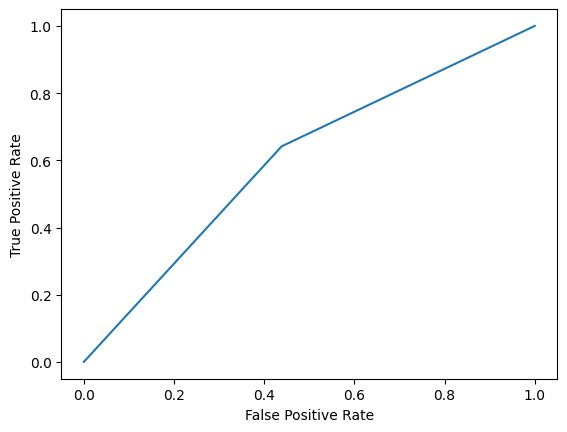

In [79]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_pred)
print(f'AUC score: {roc_auc_score(y_test, y_pred)}')

#### Overviews:
1. Nilai ROC-AUC juga terbilang kecil, yakni 0.60, artinya sistem kurang mampu membedakan antara kelas default dan kelas non-default.

### F.5. Feature Importance

Feature importance berfungsi untuk melihat feature mana yang paling berkontribusi terhadap model yang dibuat. Berikut adalah feature importance dari model credit scoring yang telah dikerjakan. 

In [80]:
save_model = best_model_tree.fit(X_trainval, y_trainval)
preprocess = save_model.named_steps['preprocess']

In [81]:
cols = list(save_model['preprocess'].named_transformers_['One Hot Encoding'].get_feature_names_out()) + \
       list(save_model['preprocess'].named_transformers_['Binary Encoder'].get_feature_names_out()) + \
       list(save_model['preprocess'].named_transformers_['Ordinal Encoding'].get_feature_names_out()) + \
       list(save_model['preprocess'].named_transformers_['Robust'].get_feature_names_out()) + \
       ['term']

In [82]:
feature_importances  = best_model_tree.named_steps['model'].feature_importances_


In [83]:
# Buat DataFrame
importance_df = pd.DataFrame({
    'Feature': cols,
    'Importance': feature_importances
})

# Urutkan berdasarkan nilai pentingnya, jika diperlukan
importance_df = importance_df.sort_values(by='Importance', ascending=False)

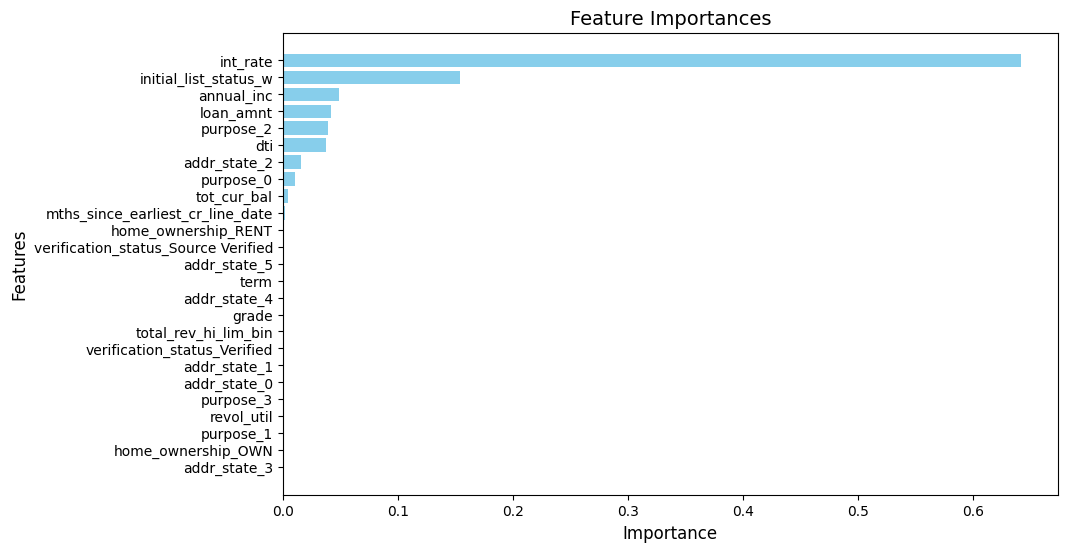

In [84]:
# Membuat bar chart dari DataFrame `importance_df`
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.gca().invert_yaxis()  # Membalikkan urutan untuk fitur dengan nilai tertinggi di atas
plt.show()


#### Overviews:
Berdasarkan data di atas akan diambil Top 6 Feature Importance sebagai berikut:
1. int_rate
2. initial_list_status
3. annual_inc
4. loan_amnt
5. purpose
6. dti 

## G. Conclusion

<div style="text-align: center; font-size: 24px; font-weight: bold;">
Features Importance
</div>



| Attribute | Data Type | Description |
| --- | --- | --- |
| int_rate | Int | Persentase suku bunga tahunan yang diterapkan pada pinjaman. Ini menunjukkan biaya yang dibayar oleh peminjam untuk meminjam uang. |
| initial_list_status | Str | status awal aplikasi pinjaman. Biasanya memiliki dua nilai: "w" untuk pinjaman yang dimulai dengan penawaran pinjaman dan "f" untuk pinjaman yang dimulai tanpa penawaran. |
| annual_inc | Int | Pendapatan tahunan yang dilaporkan oleh peminjam, yang mencakup semua sumber pendapatan yang dimiliki peminjam. |
| loan_amnt | Int | Jumlah uang yang dipinjam oleh nasabah dari pemberi pinjaman pada awal pinjaman. |
| purpose | Str | Menunjukkan tujuan pinjaman yang diajukan oleh peminjam, seperti untuk konsolidasi utang, renovasi rumah, pendidikan, dll. |
| dti | Int | Rasio utang terhadap pendapatan (Debt-to-Income ratio), mengukur jumlah utang yang dimiliki peminjam dibandingkan dengan pendapatan mereka. Rasio ini digunakan untuk menilai kemampuan pembayaran pinjaman peminjam. |


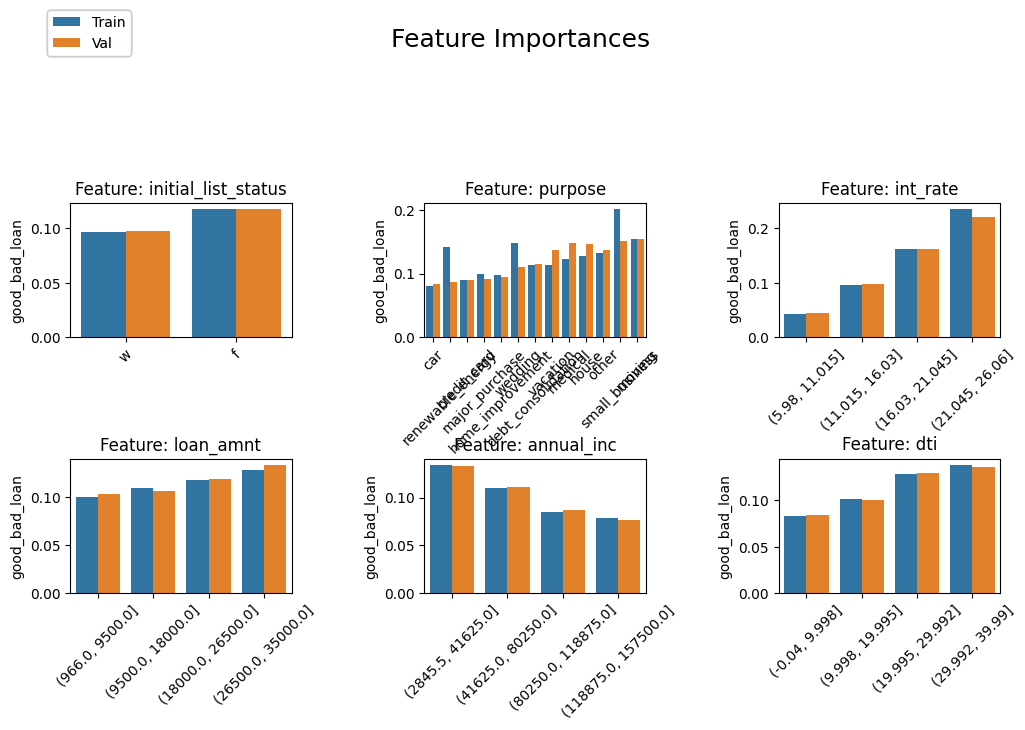

In [87]:
category = ['initial_list_status', 'purpose']
numeric = ['int_rate', 'loan_amnt', 'annual_inc', 'dti']
columns = ['initial_list_status', 'purpose', 'int_rate', 'loan_amnt', 'annual_inc', 'dti']

plt.figure(figsize=(12, 25))

for i, col in enumerate(columns, start=1):
    plt.subplot(8, 3, i)
    if col in numeric:
        df_modelling['bin'] = pd.cut(df_modelling[col], 4)   
        df1 = df_modelling.groupby(['group', 'bin'])['good_bad_loan'].mean().reset_index()

        sns.barplot(x='bin', y='good_bad_loan', data=df1, hue='group')
        plt.title(f'Feature: {col}')
        plt.xlabel('')
        plt.xticks(rotation=45)
        plt.legend(loc='upper left', bbox_to_anchor=(0.1, 0.96), bbox_transform=plt.gcf().transFigure)
        plt.tight_layout()
        
    elif col in category:
        df1 = df_modelling.groupby(['group',col])['good_bad_loan'].mean().reset_index() 
        df1 = df1.sort_values(by='good_bad_loan', ascending=True) 
        sns.barplot(x=col, y='good_bad_loan', data=df1, hue='group')
        plt.xticks(rotation=45)
        plt.xlabel('')
        plt.legend(loc='upper left', bbox_to_anchor=(0.1, 0.96), bbox_transform=plt.gcf().transFigure)
        plt.title(f'Feature: {col}')  

plt.suptitle('Feature Importances', x=0.5, y=0.95, fontsize=18)
plt.subplots_adjust(wspace=0.6, hspace=0.9)
plt.show()



In [86]:
df_modelling['purpose'].value_counts()

debt_consolidation    169296
credit_card            64673
home_improvement       14119
other                  12728
major_purchase          4691
small_business          2717
medical                 2498
car                     2321
moving                  1592
vacation                1429
house                   1086
wedding                  657
renewable_energy         150
Name: purpose, dtype: int64

#### Overviews:
1. Pada bagian awal disebutkan bahwa terdapat dua tujuan (Goals) pada projek ini, yakni pertama adalah membuat sistem prediksi terhadap pinjaman yang diajukan dan kedua adalah mengetahui faktor-faktor atau feature-feature mana saja yang berpengaruh terhadap prediksi tersebut.
2. Machine Learning yang dibangun mungkin gagal memenuhi tujuan pertama, namun penyimpulan terhadap faktor-faktor yang berpengaruh tetap dapat dilakukan sebagai berikut.
     - Pinjaman yang dimulai tanpa penawaran dari bank memiliki potensi default lebih besar dibandingkan pinjaman yang dimulai dengan tawaran dari bank. Artinya, bank cukup mampu menyeleksi calon peminjamnya dan harus berhati-hati terhadap nasabah yang mengajukan pinjaman tanpa tawaran.
     - Terdapat 3 tujuan utama peminjam, yakni debt_consolidation, credit_card dan home_improvement. Di masa depan, bank dapat lebih fokus menawarkan produk pinjaman terhadap top 3 purpose tersebut untuk memaksimalkan keuntungan bank, dengan tetap berhati-hati terhadap peminjam default.
     - int_rate mengindikasikan bahwa ketika suku bunga tahunan naik, maka potensi nasabah default cenderung lebih besar. Dengan demikian, bank harus berhati-hati ketika memberikan pinjaman saat int_rate sedang tinggi.
     - loan_amnt mengindikasikan bahwa semakin besar pinjaman, potensi defaultnya juga semakin berisiko. 
     - annual_inc mengindikasikan semakin kecil penghasilan tahunan, potensi default akan cenderung besar. Oleh sebab itu, bank harus dapat menyesuaikan besaran pinjaman terhadap income calon nasabahnya.
     - dti mengindikasikan semakin besar rasio utang terhadap pendapatan, potensi default juga semakin besar. 
